## **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, precision_score, recall_score, auc, confusion_matrix, roc_curve, RocCurveDisplay


# **Data exploration, cleaning and visualization**

In [ ]:
df = pd.read_csv("/content/Project_Phase1.csv")
df.head()

syn_error_rate  connection_time  destination_same_source_port_rate  \
0             0.0                0                               0.01   
1             1.0                0                               0.00   
2             1.0                0                               0.00   
3             1.0                0                               0.00   
4             1.0                0                               0.00   

   destination_different_server_rate connection_status  connection_count  \
0                               0.00                SF                 2   
1                               0.07                S0               242   
2                               0.08                S0               234   
3                               0.08                S0               140   
4                               0.07                S0               126   

   destination_server_different_host_rate  suspicious_activity protocol  \
0                                     0.0                    2      tcp   
1                                     0.0                    0      tcp   
2                                     0.0                    0      tcp   
3                                     0.0                    0      tcp   
4                                     0.0                    0      tcp   

   server_different_host_rate  ...  destination_server_reset_error_rate  \
0                         0.0  ...                                 0.01   
1                         0.0  ...                                 0.00   
2                         0.0  ...                                 0.00   
3                         0.0  ...                                 0.00   
4                         0.0  ...                                 0.00   

   server_reset_error_rate  server_syn_error_rate  destination_bytes  \
0                      0.0                    0.0               8314   
1                      0.0                    1.0                  0   
2                      0.0                    1.0                  0   
3                      0.0                    1.0                  0   
4                      0.0                    1.0                  0   

   guest_login  authentication_status destination_host_count  \
0            0                      1                     87   
1            0                      0                    255   
2            0                      0                    255   
3            0                      0                    255   
4            0                      0                    255   

   destination_reset_error_rate  different_server_rate    class  
0                          0.01                   0.00  anomaly  
1                          0.00                   0.07  anomaly  
2                          0.00                   0.06  anomaly  
3                          0.00                   0.06  anomaly  
4                          0.00                   0.06  anomaly  

[5 rows x 31 columns]

In [ ]:
df.shape

(14036, 31)

In [ ]:
df.columns

Index(['syn_error_rate', 'connection_time',
       'destination_same_source_port_rate',
       'destination_different_server_rate', 'connection_status',
       'connection_count', 'destination_server_different_host_rate',
       'suspicious_activity', 'protocol', 'server_different_host_rate',
       'destination_server_syn_error_rate', 'destination_host_server_count',
       'destination_same_server_rate', 'fragment_errors', 'compromised_count',
       'source_bytes', 'service_type', 'destination_syn_error_rate',
       'same_server_rate', 'reset_error_rate', 'server_request_count',
       'destination_server_reset_error_rate', 'server_reset_error_rate',
       'server_syn_error_rate', 'destination_bytes', 'guest_login',
       'authentication_status', 'destination_host_count',
       'destination_reset_error_rate', 'different_server_rate', 'class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   syn_error_rate                          14036 non-null  float64
 1   connection_time                         14036 non-null  int64  
 2   destination_same_source_port_rate       14036 non-null  float64
 3   destination_different_server_rate       14036 non-null  float64
 4   connection_status                       14036 non-null  object 
 5   connection_count                        14036 non-null  int64  
 6   destination_server_different_host_rate  14036 non-null  float64
 7   suspicious_activity                     14036 non-null  int64  
 8   protocol                                14036 non-null  object 
 9   server_different_host_rate              14036 non-null  float64
 10  destination_server_syn_error_rate       14036 non-null  fl

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

syn_error_rate                            0
connection_time                           0
destination_same_source_port_rate         0
destination_different_server_rate         0
connection_status                         0
connection_count                          0
destination_server_different_host_rate    0
suspicious_activity                       0
protocol                                  0
server_different_host_rate                0
destination_server_syn_error_rate         0
destination_host_server_count             0
destination_same_server_rate              0
fragment_errors                           0
compromised_count                         0
source_bytes                              0
service_type                              0
destination_syn_error_rate                0
same_server_rate                          0
reset_error_rate                          0
server_request_count                      0
destination_server_reset_error_rate       0
server_reset_error_rate                   0
server_syn_error_rate                     0
destination_bytes                         0
guest_login                               0
authentication_status                     0
destination_host_count                    0
destination_reset_error_rate              0
different_server_rate                     0
class                                     0
dtype: int64

In [ ]:
df.head()

syn_error_rate  connection_time  destination_same_source_port_rate  \
0             0.0                0                               0.01   
1             1.0                0                               0.00   
2             1.0                0                               0.00   
3             1.0                0                               0.00   
4             1.0                0                               0.00   

   destination_different_server_rate connection_status  connection_count  \
0                               0.00                SF                 2   
1                               0.07                S0               242   
2                               0.08                S0               234   
3                               0.08                S0               140   
4                               0.07                S0               126   

   destination_server_different_host_rate  suspicious_activity protocol  \
0                                     0.0                    2      tcp   
1                                     0.0                    0      tcp   
2                                     0.0                    0      tcp   
3                                     0.0                    0      tcp   
4                                     0.0                    0      tcp   

   server_different_host_rate  ...  destination_server_reset_error_rate  \
0                         0.0  ...                                 0.01   
1                         0.0  ...                                 0.00   
2                         0.0  ...                                 0.00   
3                         0.0  ...                                 0.00   
4                         0.0  ...                                 0.00   

   server_reset_error_rate  server_syn_error_rate  destination_bytes  \
0                      0.0                    0.0               8314   
1                      0.0                    1.0                  0   
2                      0.0                    1.0                  0   
3                      0.0                    1.0                  0   
4                      0.0                    1.0                  0   

   guest_login  authentication_status destination_host_count  \
0            0                      1                     87   
1            0                      0                    255   
2            0                      0                    255   
3            0                      0                    255   
4            0                      0                    255   

   destination_reset_error_rate  different_server_rate    class  
0                          0.01                   0.00  anomaly  
1                          0.00                   0.07  anomaly  
2                          0.00                   0.06  anomaly  
3                          0.00                   0.06  anomaly  
4                          0.00                   0.06  anomaly  

[5 rows x 31 columns]

In [ ]:
df.tail()

syn_error_rate  connection_time  destination_same_source_port_rate  \
14031             0.0                0                               0.12   
14032             0.0                0                               0.00   
14033             0.0               29                               0.00   
14034             0.0                1                               0.08   
14035             0.5                0                               0.01   

       destination_different_server_rate connection_status  connection_count  \
14031                               0.07                SF                 1   
14032                               0.00                SF                19   
14033                               0.02                SF                 1   
14034                               0.17                SF                 1   
14035                               0.00                S1                 2   

       destination_server_different_host_rate  suspicious_activity protocol  \
14031                                    0.07                    0      tcp   
14032                                    0.00                    0      tcp   
14033                                    0.00                    6      tcp   
14034                                    0.00                    0      tcp   
14035                                    0.01                    0      tcp   

       server_different_host_rate  ...  destination_server_reset_error_rate  \
14031                        0.00  ...                                  0.0   
14032                        0.00  ...                                  0.0   
14033                        0.00  ...                                  0.1   
14034                        1.00  ...                                  0.0   
14035                        0.06  ...                                  0.0   

       server_reset_error_rate  server_syn_error_rate  destination_bytes  \
14031                      0.0                   0.00                  0   
14032                      0.0                   0.00               2486   
14033                      0.0                   0.00               1063   
14034                      0.0                   0.00                333   
14035                      0.0                   0.03              14600   

       guest_login  authentication_status destination_host_count  \
14031            0                      0                     58   
14032            0                      1                    255   
14033            1                      1                    255   
14034            0                      1                     12   
14035            0                      1                    173   

       destination_reset_error_rate  different_server_rate   class  
14031                          0.00                    0.0  normal  
14032                          0.00                    0.0  normal  
14033                          0.03                    0.0  normal  
14034                          0.00                    0.0  normal  
14035                          0.01                    0.0  normal  

[5 rows x 31 columns]

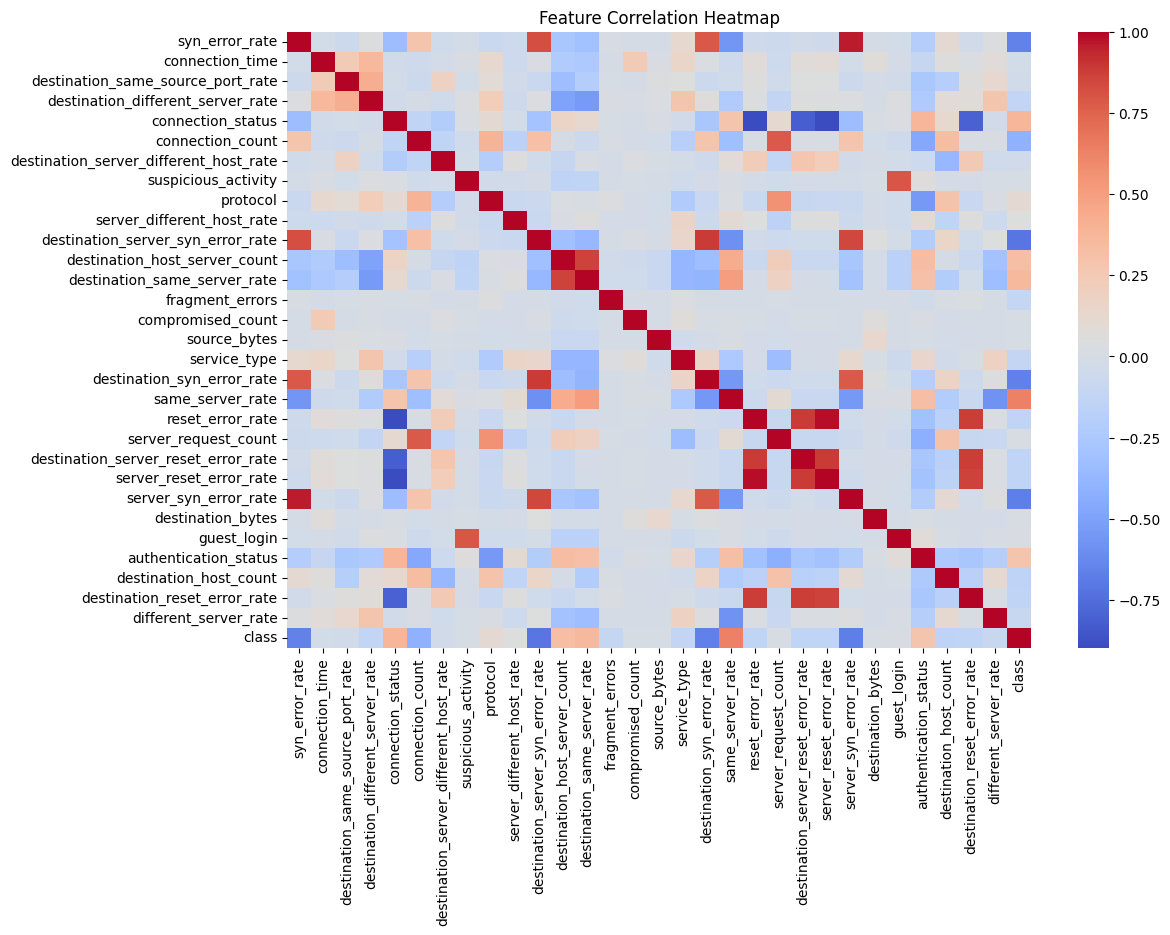

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
corr = df.corr()
abs(corr["class"]).sort_values(ascending=False)[1:21]

destination_server_syn_error_rate      0.716601
server_syn_error_rate                  0.669812
destination_syn_error_rate             0.661881
syn_error_rate                         0.655461
same_server_rate                       0.635968
connection_count                       0.410791
connection_status                      0.380204
destination_same_server_rate           0.360247
destination_host_server_count          0.332426
authentication_status                  0.286279
destination_host_count                 0.144451
destination_server_reset_error_rate    0.141059
reset_error_rate                       0.139167
destination_reset_error_rate           0.138252
server_reset_error_rate                0.136971
destination_different_server_rate      0.119493
service_type                           0.113361
fragment_errors                        0.111136
protocol                               0.107307
different_server_rate                  0.089732
Name: class, dtype: float64

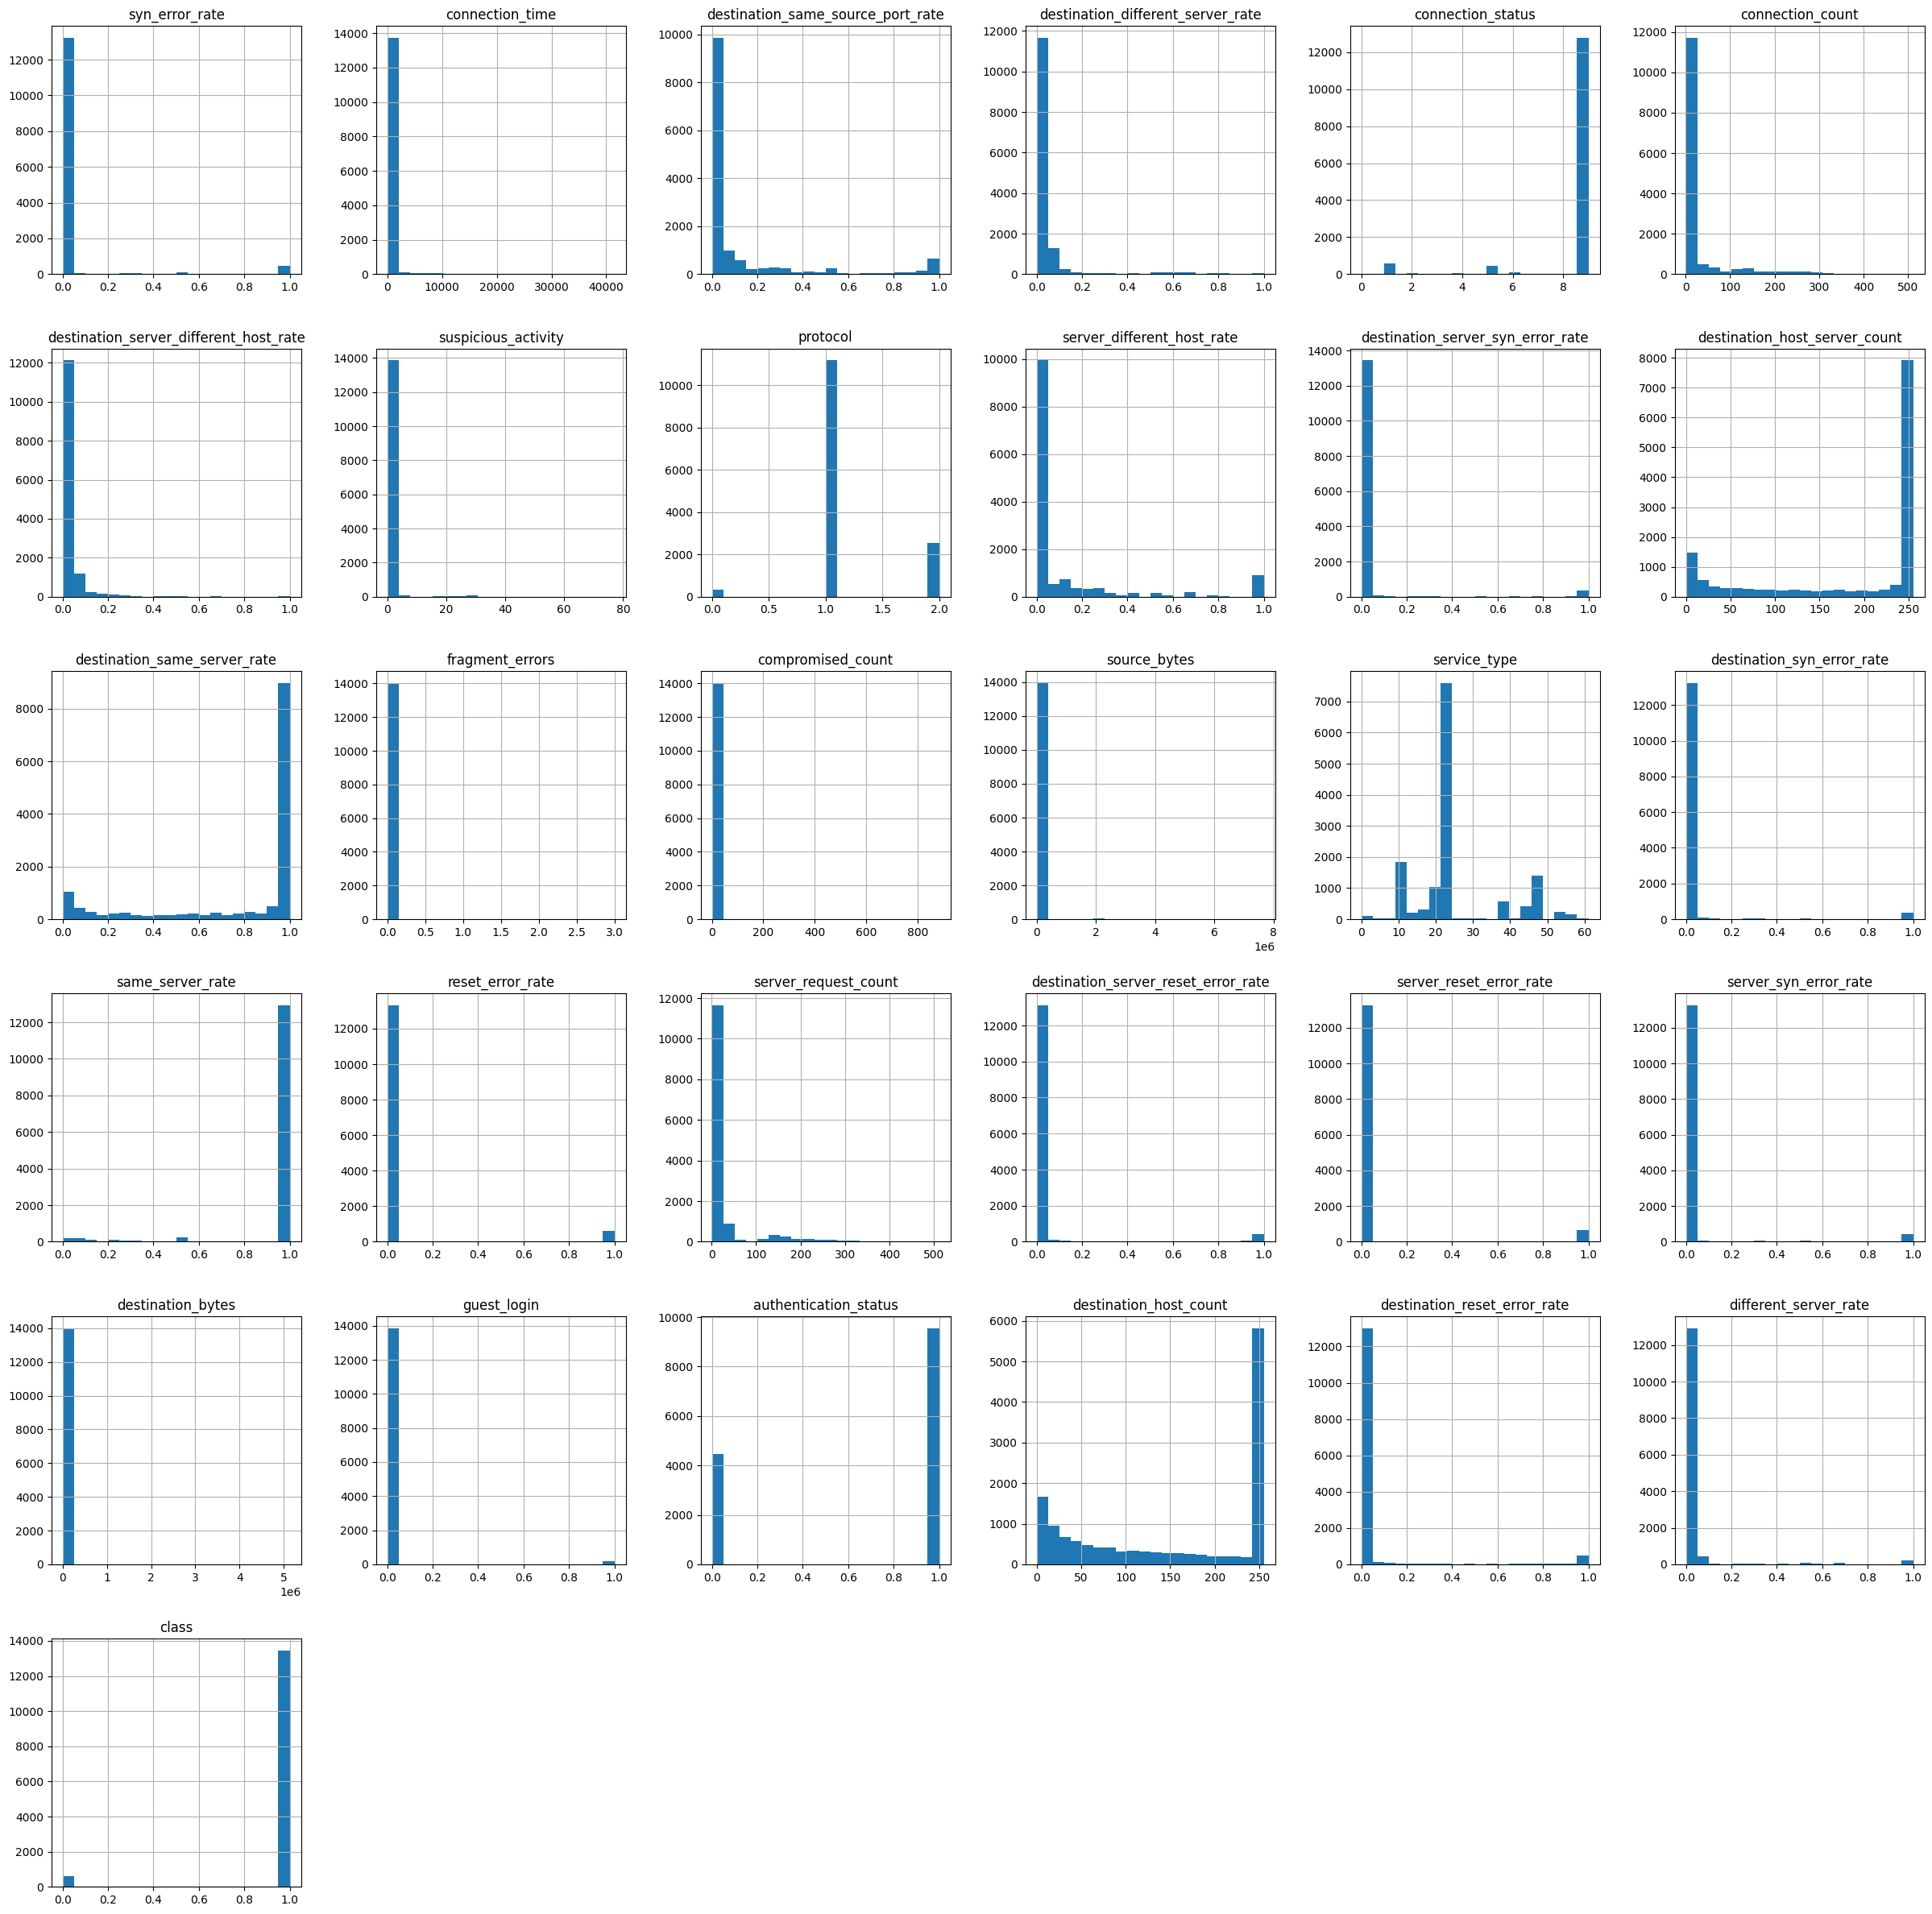

In [ ]:
df.hist(bins=20, figsize=(30,30))
plt.show()

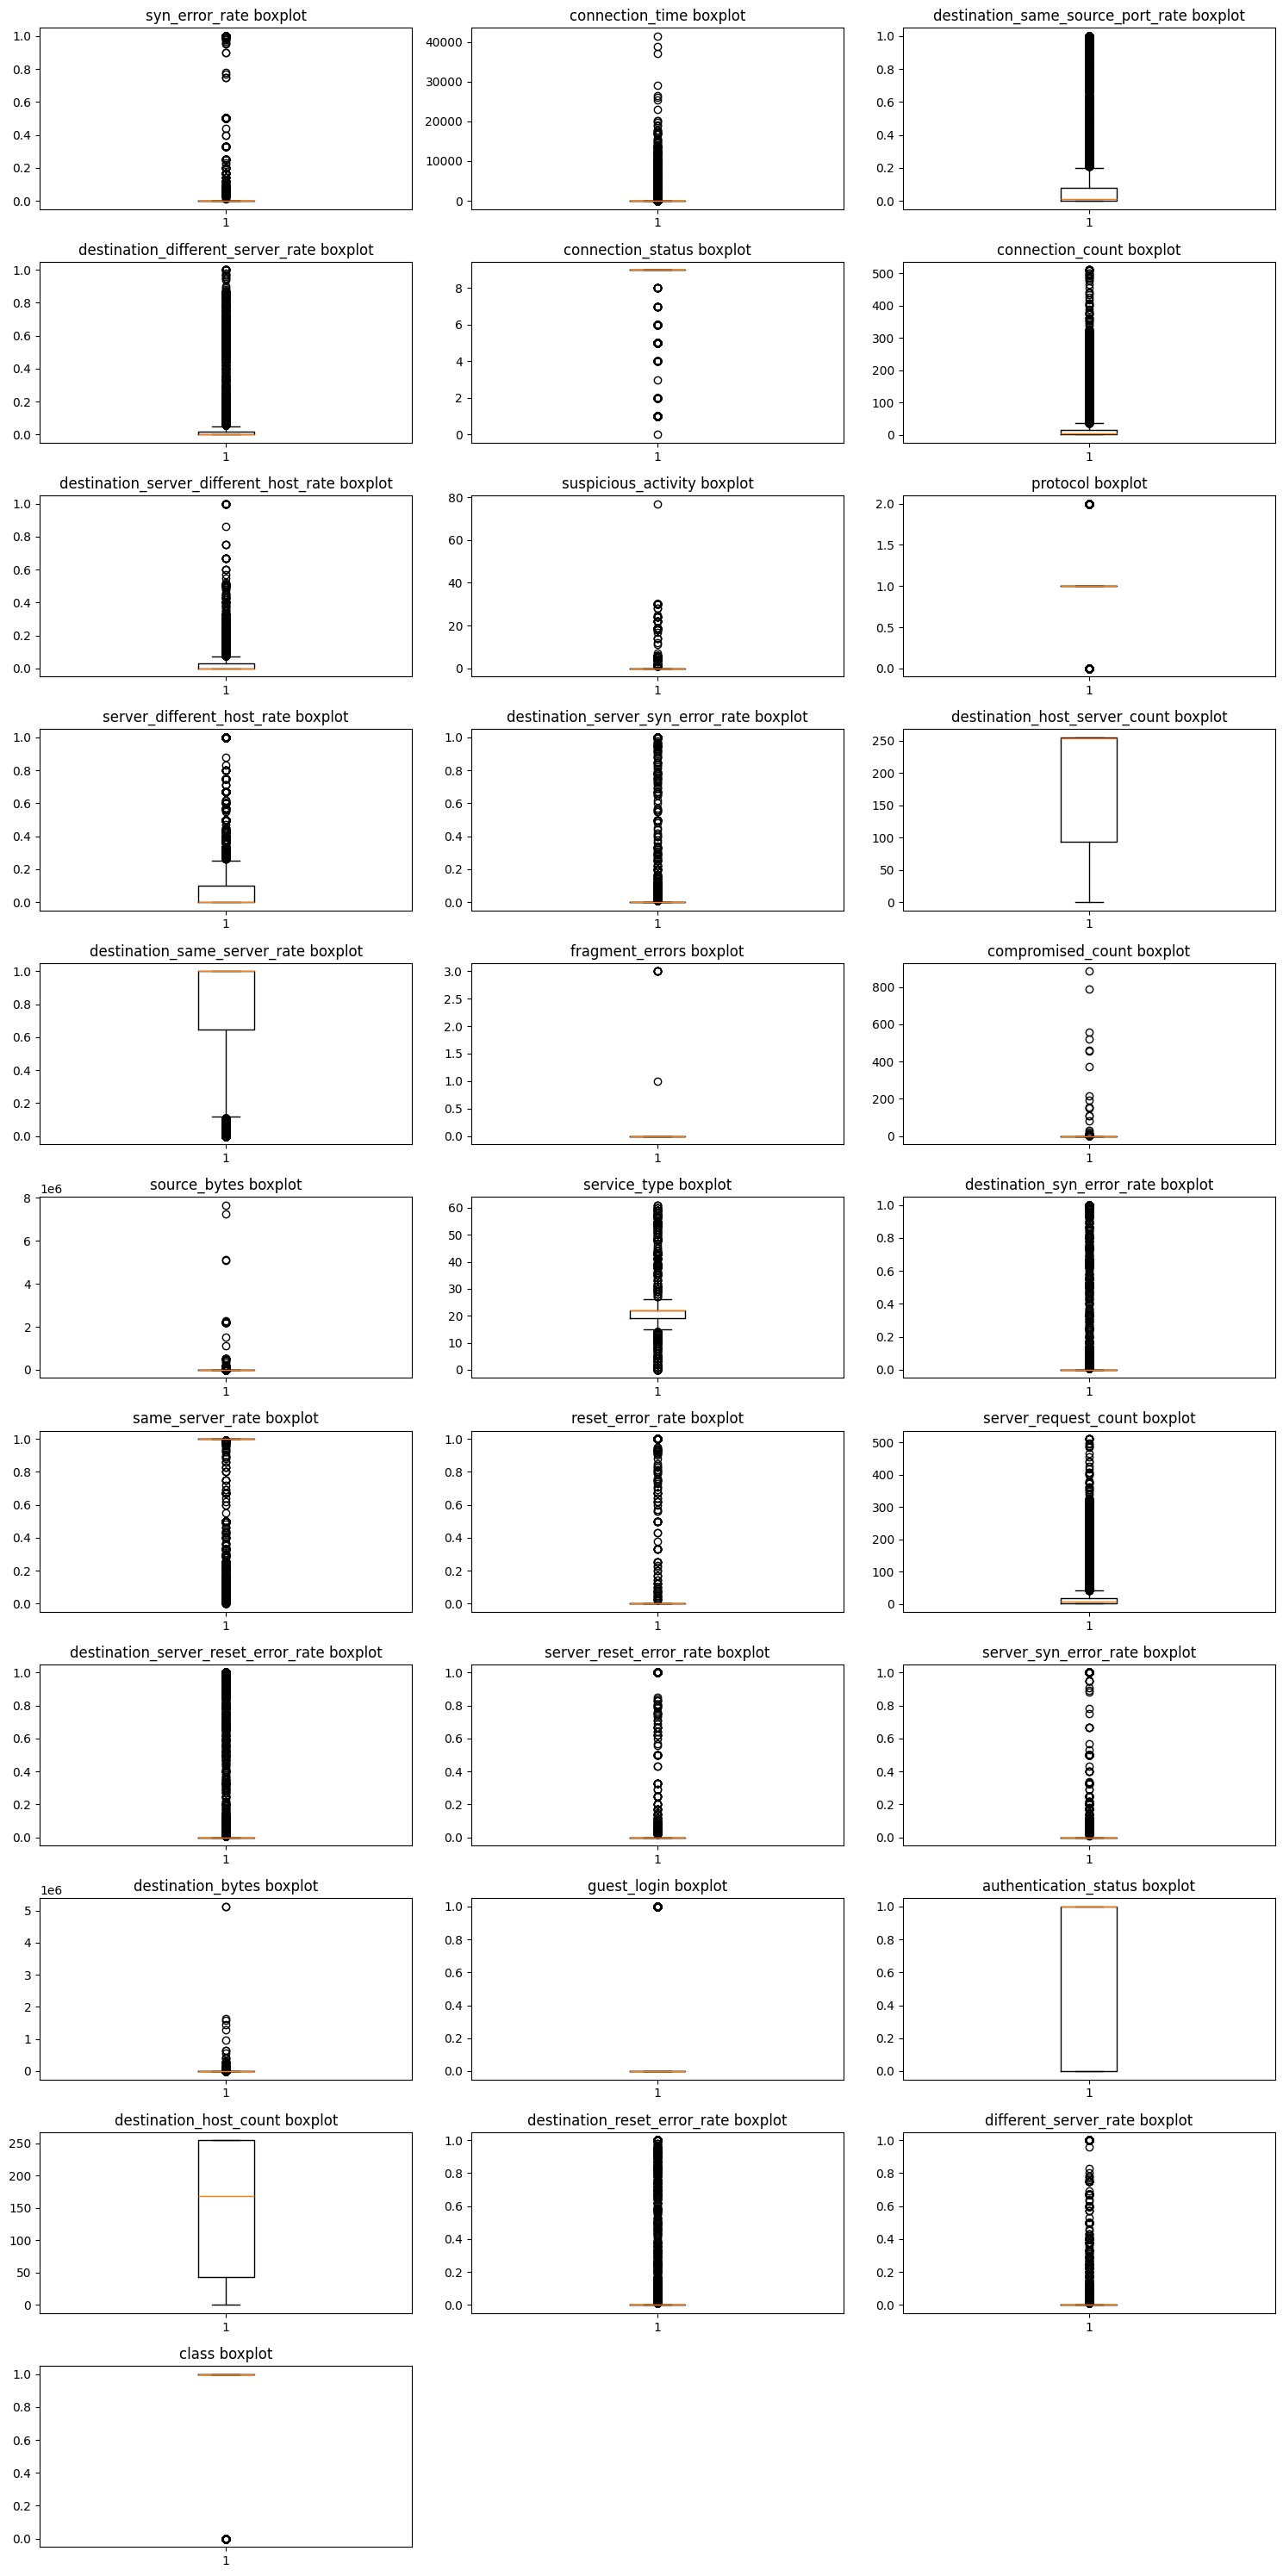

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(11, 3, figsize=(15, 30))
axes = axes.flatten()

for i in range(len(df.columns)):
    axes[i].boxplot(df[df.columns[i]])
    axes[i].set_title(f"{df.columns[i]} boxplot")

for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


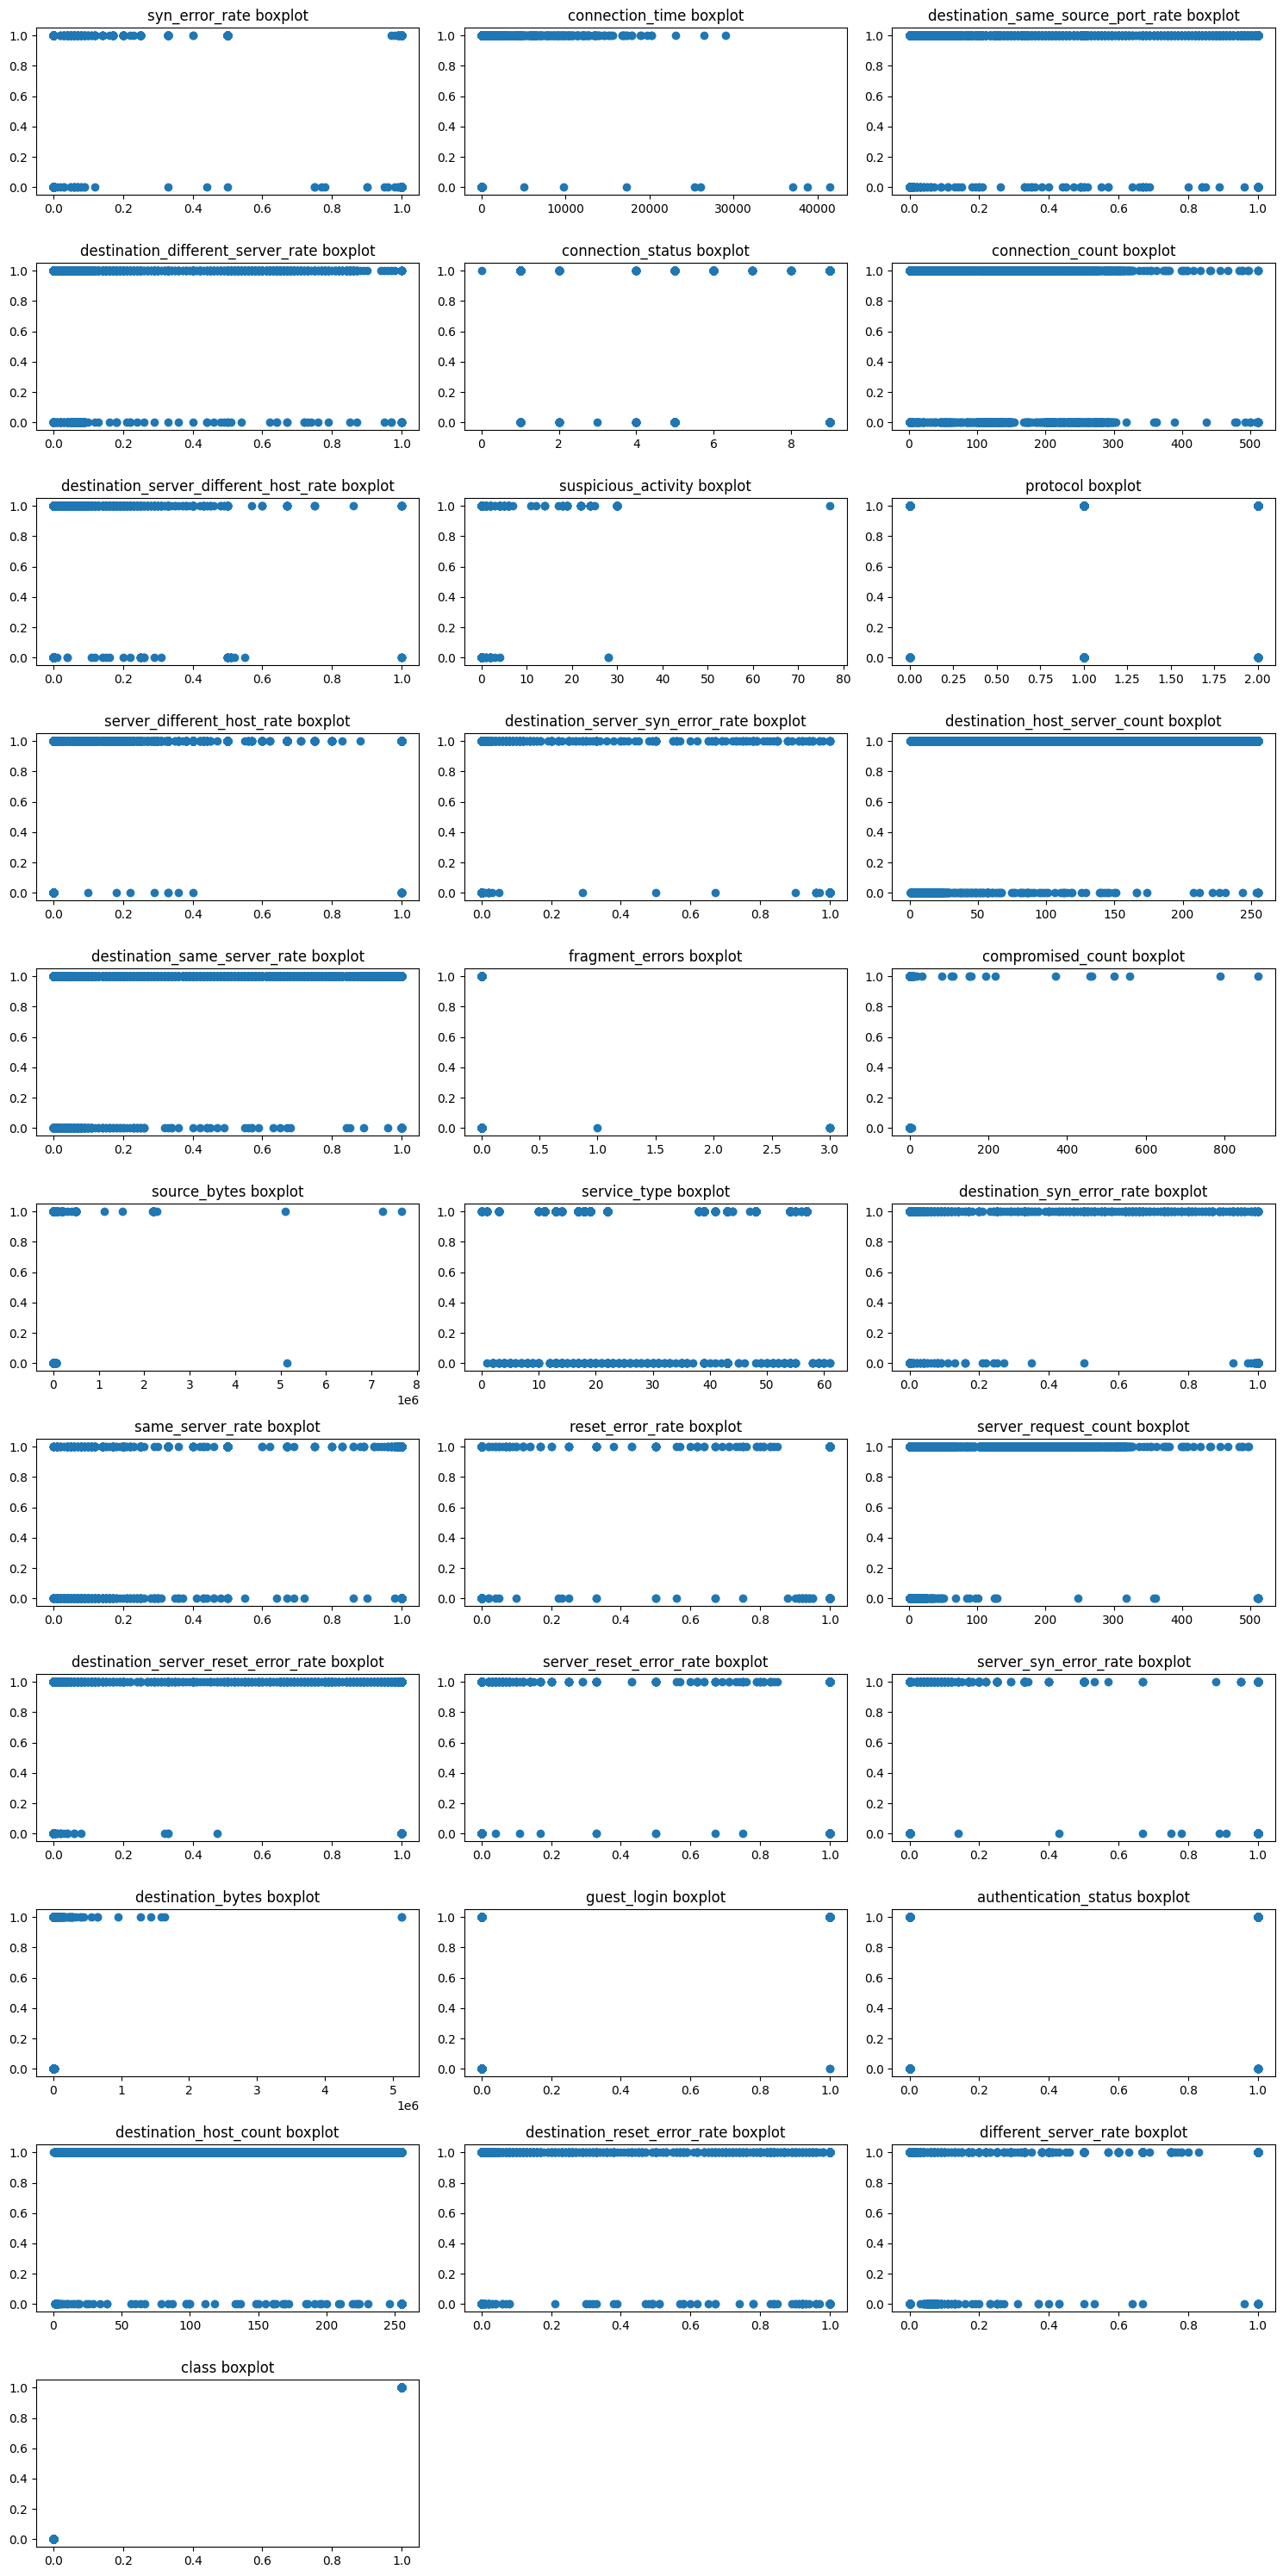

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(11, 3, figsize=(15, 30))
axes = axes.flatten()

for i in range(len(df.columns)):
    axes[i].scatter(df[df.columns[i]], df['class'])
    axes[i].set_title(f"{df.columns[i]} boxplot")

for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# **Feature engineering**

In [ ]:
corr = df.corr()
selected_20_columns= abs(corr["class"]).sort_values(ascending=False)[:21]
selected_20_columns_names = selected_20_columns.keys()
selected_20_columns_names.tolist()

['class',
 'destination_server_syn_error_rate',
 'server_syn_error_rate',
 'destination_syn_error_rate',
 'syn_error_rate',
 'same_server_rate',
 'connection_count',
 'connection_status',
 'destination_same_server_rate',
 'destination_host_server_count',
 'authentication_status',
 'destination_host_count',
 'destination_server_reset_error_rate',
 'reset_error_rate',
 'destination_reset_error_rate',
 'server_reset_error_rate',
 'destination_different_server_rate',
 'service_type',
 'fragment_errors',
 'protocol',
 'different_server_rate']

In [ ]:
df2 = df[selected_20_columns_names]
df_cleaned_global = df2.copy(deep=True)
df2.head()

class  destination_server_syn_error_rate  server_syn_error_rate  \
0      0                                0.0                    0.0   
1      0                                1.0                    1.0   
2      0                                1.0                    1.0   
3      0                                1.0                    1.0   
4      0                                1.0                    1.0   

   destination_syn_error_rate  syn_error_rate  same_server_rate  \
0                         0.0             0.0              1.00   
1                         1.0             1.0              0.02   
2                         1.0             1.0              0.07   
3                         1.0             1.0              0.01   
4                         1.0             1.0              0.09   

   connection_count  connection_status  destination_same_server_rate  \
0                 2                  9                          1.00   
1               242                  5                          0.02   
2               234                  5                          0.05   
3               140                  5                          0.00   
4               126                  5                          0.04   

   destination_host_server_count  ...  destination_host_count  \
0                             87  ...                      87   
1                              6  ...                     255   
2                             12  ...                     255   
3                              1  ...                     255   
4                             11  ...                     255   

   destination_server_reset_error_rate  reset_error_rate  \
0                                 0.01               0.0   
1                                 0.00               0.0   
2                                 0.00               0.0   
3                                 0.00               0.0   
4                                 0.00               0.0   

   destination_reset_error_rate  server_reset_error_rate  \
0                          0.01                      0.0   
1                          0.00                      0.0   
2                          0.00                      0.0   
3                          0.00                      0.0   
4                          0.00                      0.0   

   destination_different_server_rate  service_type  fragment_errors  protocol  \
0                               0.00            22                0         1   
1                               0.07            29                0         1   
2                               0.08             4                0         1   
3                               0.08             7                0         1   
4                               0.07            25                0         1   

   different_server_rate  
0                   0.00  
1                   0.07  
2                   0.06  
3                   0.06  
4                   0.06  

[5 rows x 21 columns]

In [ ]:
df2.shape

(14036, 21)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   class                                14036 non-null  int64  
 1   destination_server_syn_error_rate    14036 non-null  float64
 2   server_syn_error_rate                14036 non-null  float64
 3   destination_syn_error_rate           14036 non-null  float64
 4   syn_error_rate                       14036 non-null  float64
 5   same_server_rate                     14036 non-null  float64
 6   connection_count                     14036 non-null  int64  
 7   connection_status                    14036 non-null  int64  
 8   destination_same_server_rate         14036 non-null  float64
 9   destination_host_server_count        14036 non-null  int64  
 10  authentication_status                14036 non-null  int64  
 11  destination_host_count      

In [ ]:
x = df2.drop(["class"], axis=1)
y = df2["class"]
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
scaled_columns_train= x_train[["destination_host_count","destination_host_server_count","connection_count", "service_type"]]
scaled_columns_test= x_test[["destination_host_count","destination_host_server_count","connection_count", "service_type"]]
robust.fit(scaled_columns_train)

RobustScaler()

In [ ]:
x_train_scaled=robust.transform(scaled_columns_train)
x_test_scaled=robust.transform(scaled_columns_test)

In [ ]:
df2.drop(["destination_host_count","destination_host_server_count","connection_count","service_type"], axis=1, inplace=True)

<ipython-input-23-625bcbea249f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["destination_host_count","destination_host_server_count","connection_count","service_type"], axis=1, inplace=True)


In [ ]:
x_train.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_train_scaled
x_test.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_test_scaled

<ipython-input-24-824e1a43276a>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.71830986  0.4084507  -0.40375587 ... -0.22535211  0.4084507
 -0.0657277 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_train_scaled
<ipython-input-24-824e1a43276a>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.00609756 -1.52439024  0.00609756 ... -1.35365854  0.00609756
 -1.12804878]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_train_scaled
<ipython-input-24-824e1a43276a>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and

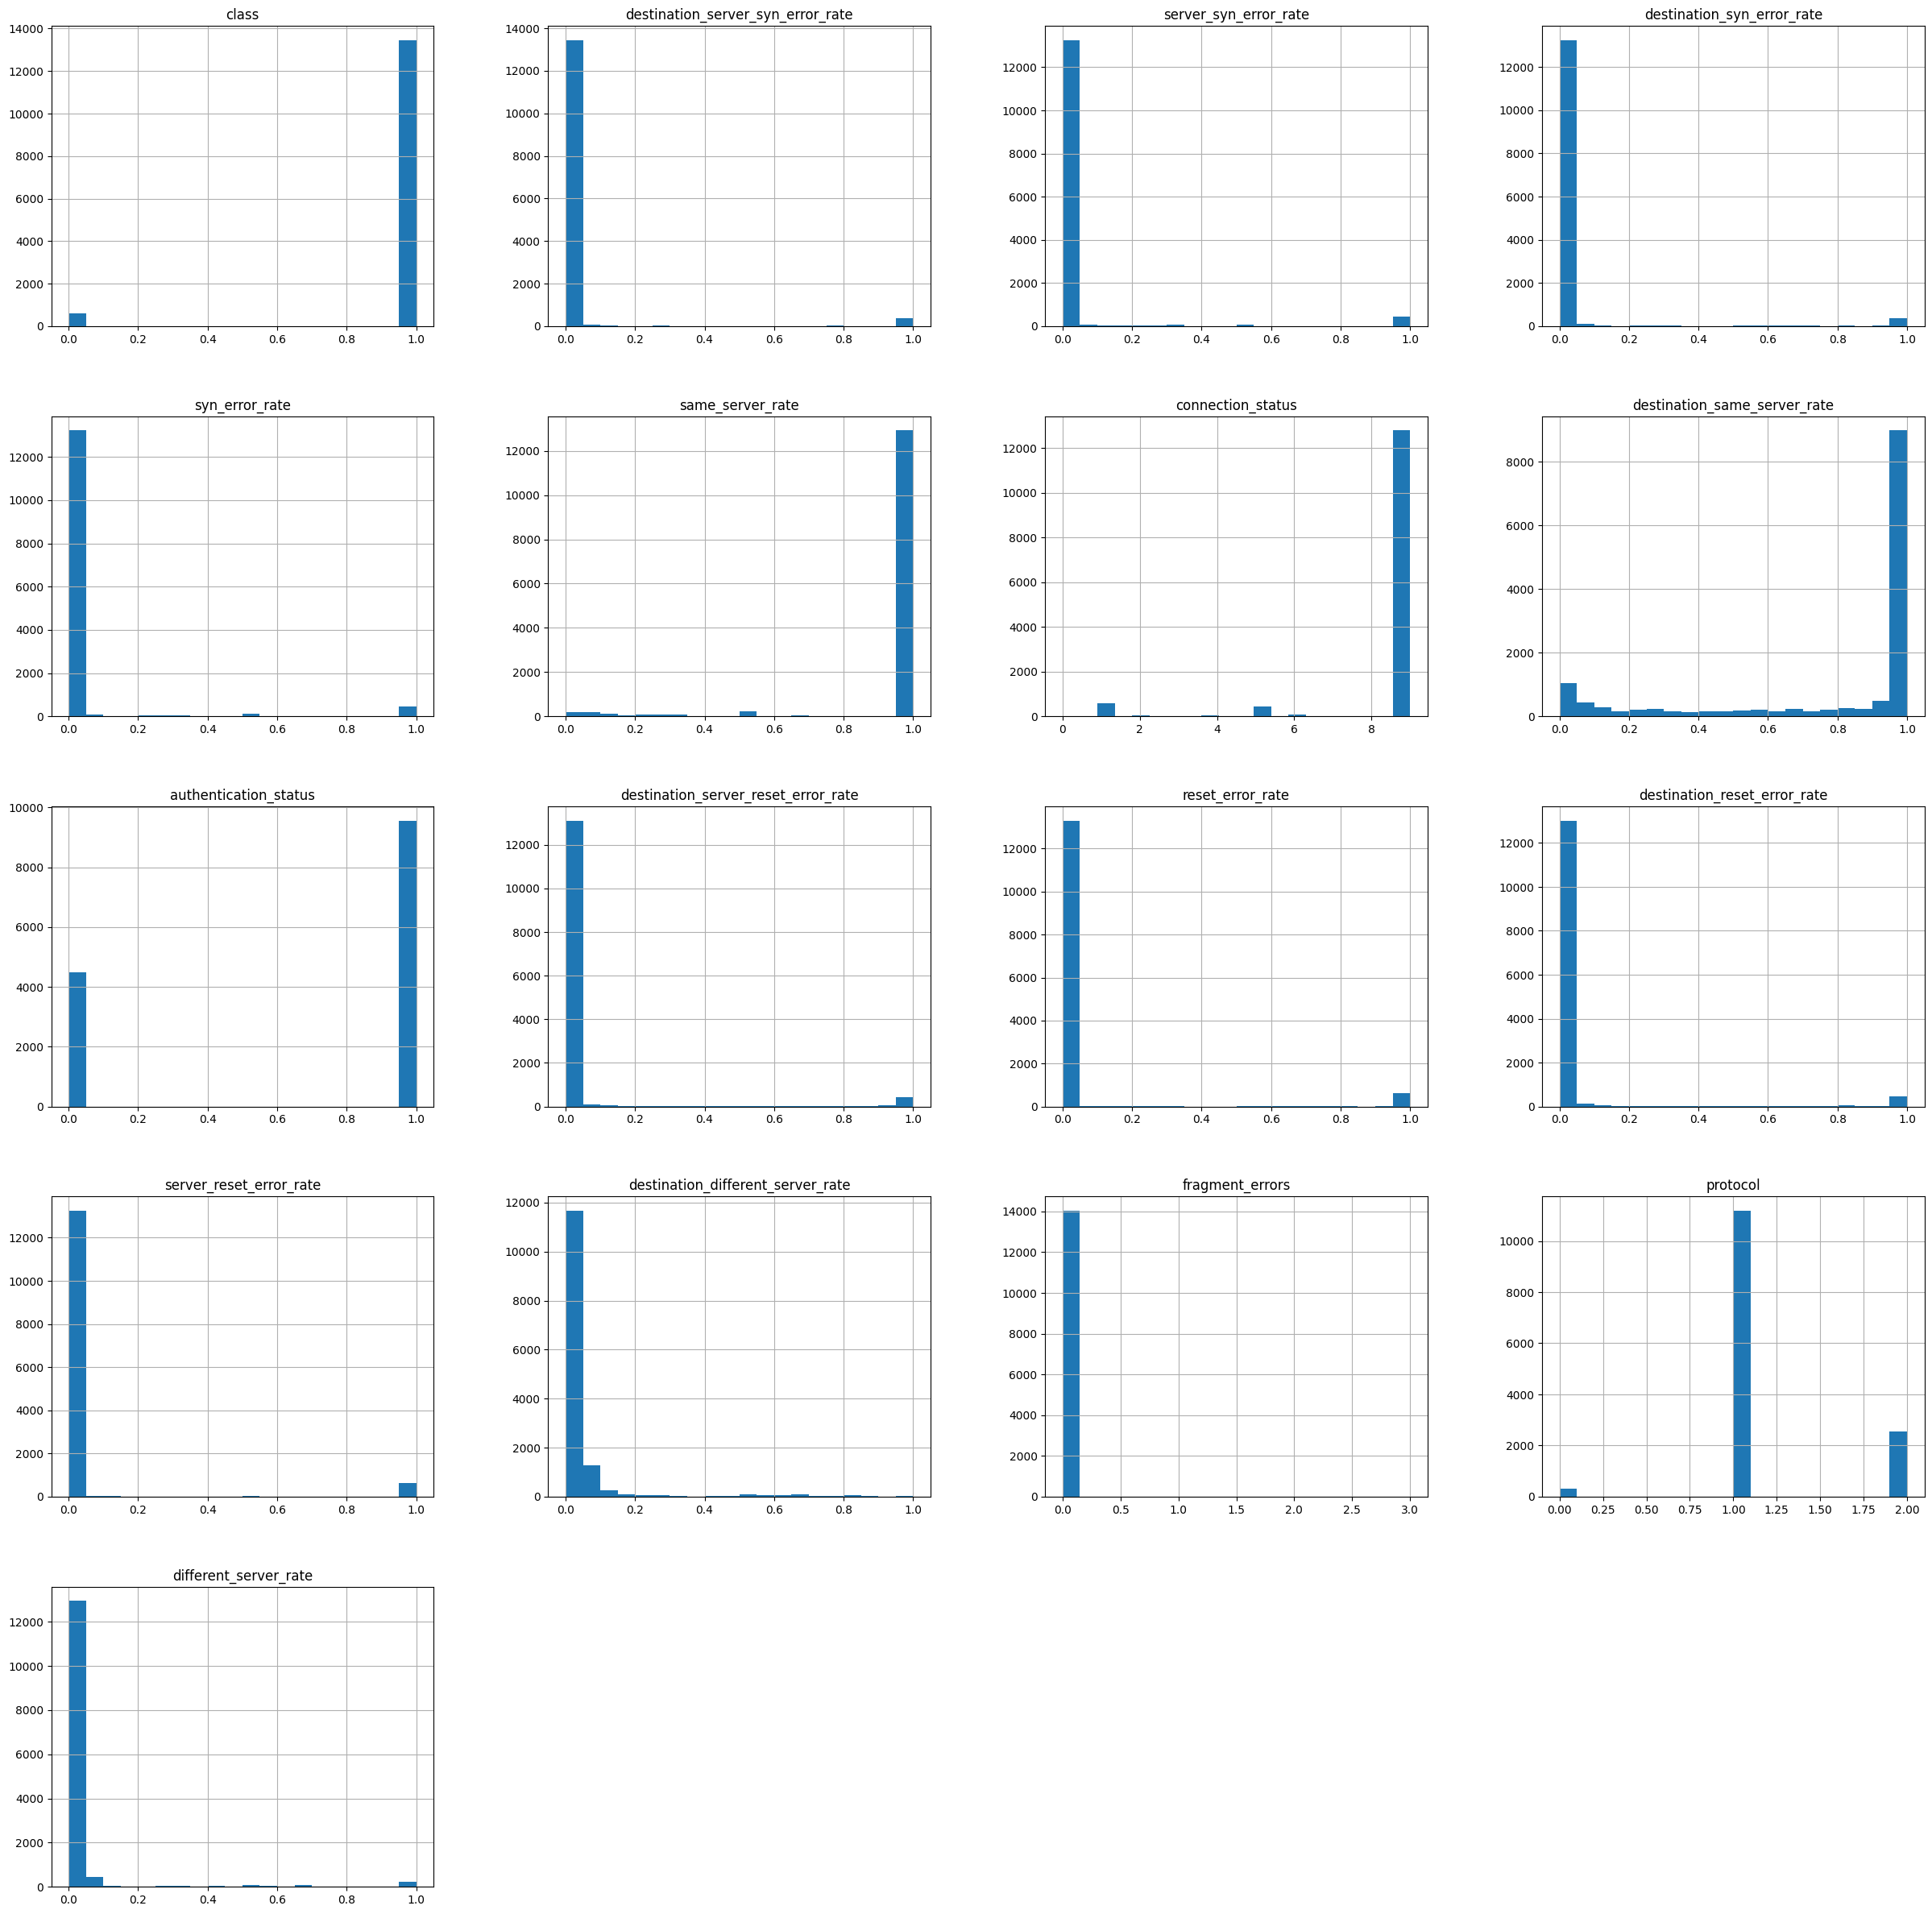

In [ ]:
df2.hist(bins=20, figsize=(30,30))
plt.show()

In [ ]:
df2.shape

(14036, 17)

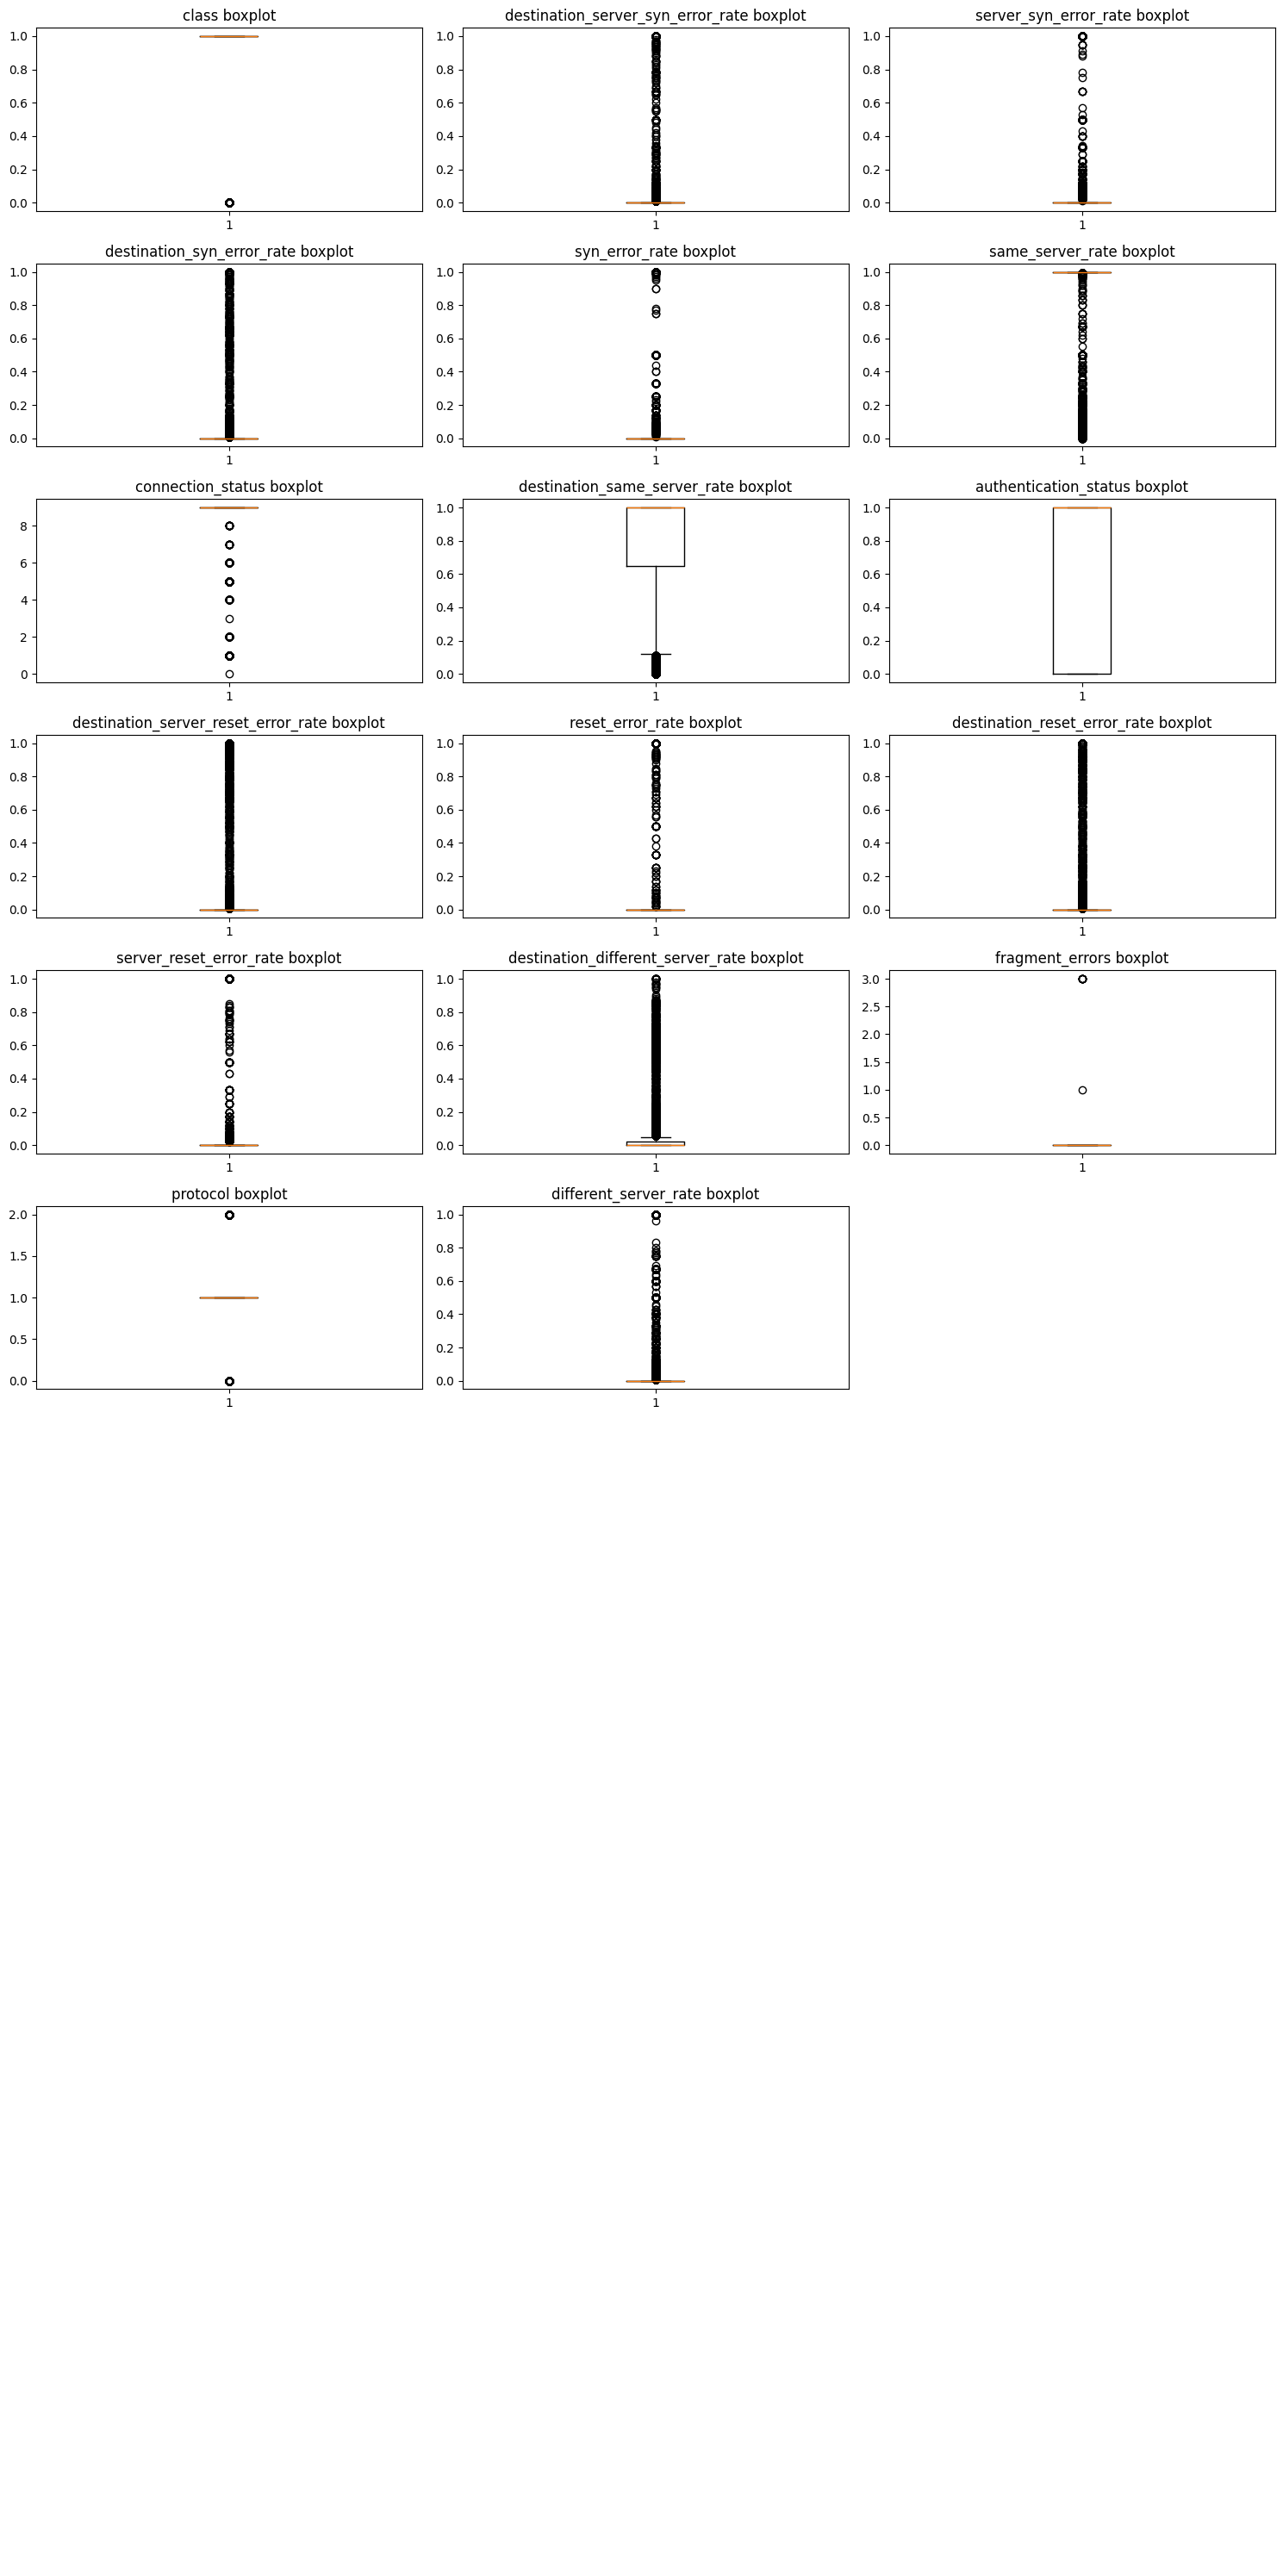

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(11, 3, figsize=(15, 30))
axes = axes.flatten()

for i in range(len(df2.columns)):
    axes[i].boxplot(df2[df2.columns[i]])
    axes[i].set_title(f"{df2.columns[i]} boxplot")

for j in range(len(df2.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df2.head()

class  destination_server_syn_error_rate  server_syn_error_rate  \
0      0                                0.0                    0.0   
1      0                                1.0                    1.0   
2      0                                1.0                    1.0   
3      0                                1.0                    1.0   
4      0                                1.0                    1.0   

   destination_syn_error_rate  syn_error_rate  same_server_rate  \
0                         0.0             0.0              1.00   
1                         1.0             1.0              0.02   
2                         1.0             1.0              0.07   
3                         1.0             1.0              0.01   
4                         1.0             1.0              0.09   

   connection_status  destination_same_server_rate  authentication_status  \
0                  9                          1.00                      1   
1                  5                          0.02                      0   
2                  5                          0.05                      0   
3                  5                          0.00                      0   
4                  5                          0.04                      0   

   destination_server_reset_error_rate  reset_error_rate  \
0                                 0.01               0.0   
1                                 0.00               0.0   
2                                 0.00               0.0   
3                                 0.00               0.0   
4                                 0.00               0.0   

   destination_reset_error_rate  server_reset_error_rate  \
0                          0.01                      0.0   
1                          0.00                      0.0   
2                          0.00                      0.0   
3                          0.00                      0.0   
4                          0.00                      0.0   

   destination_different_server_rate  fragment_errors  protocol  \
0                               0.00                0         1   
1                               0.07                0         1   
2                               0.08                0         1   
3                               0.08                0         1   
4                               0.07                0         1   

   different_server_rate  
0                   0.00  
1                   0.07  
2                   0.06  
3                   0.06  
4                   0.06

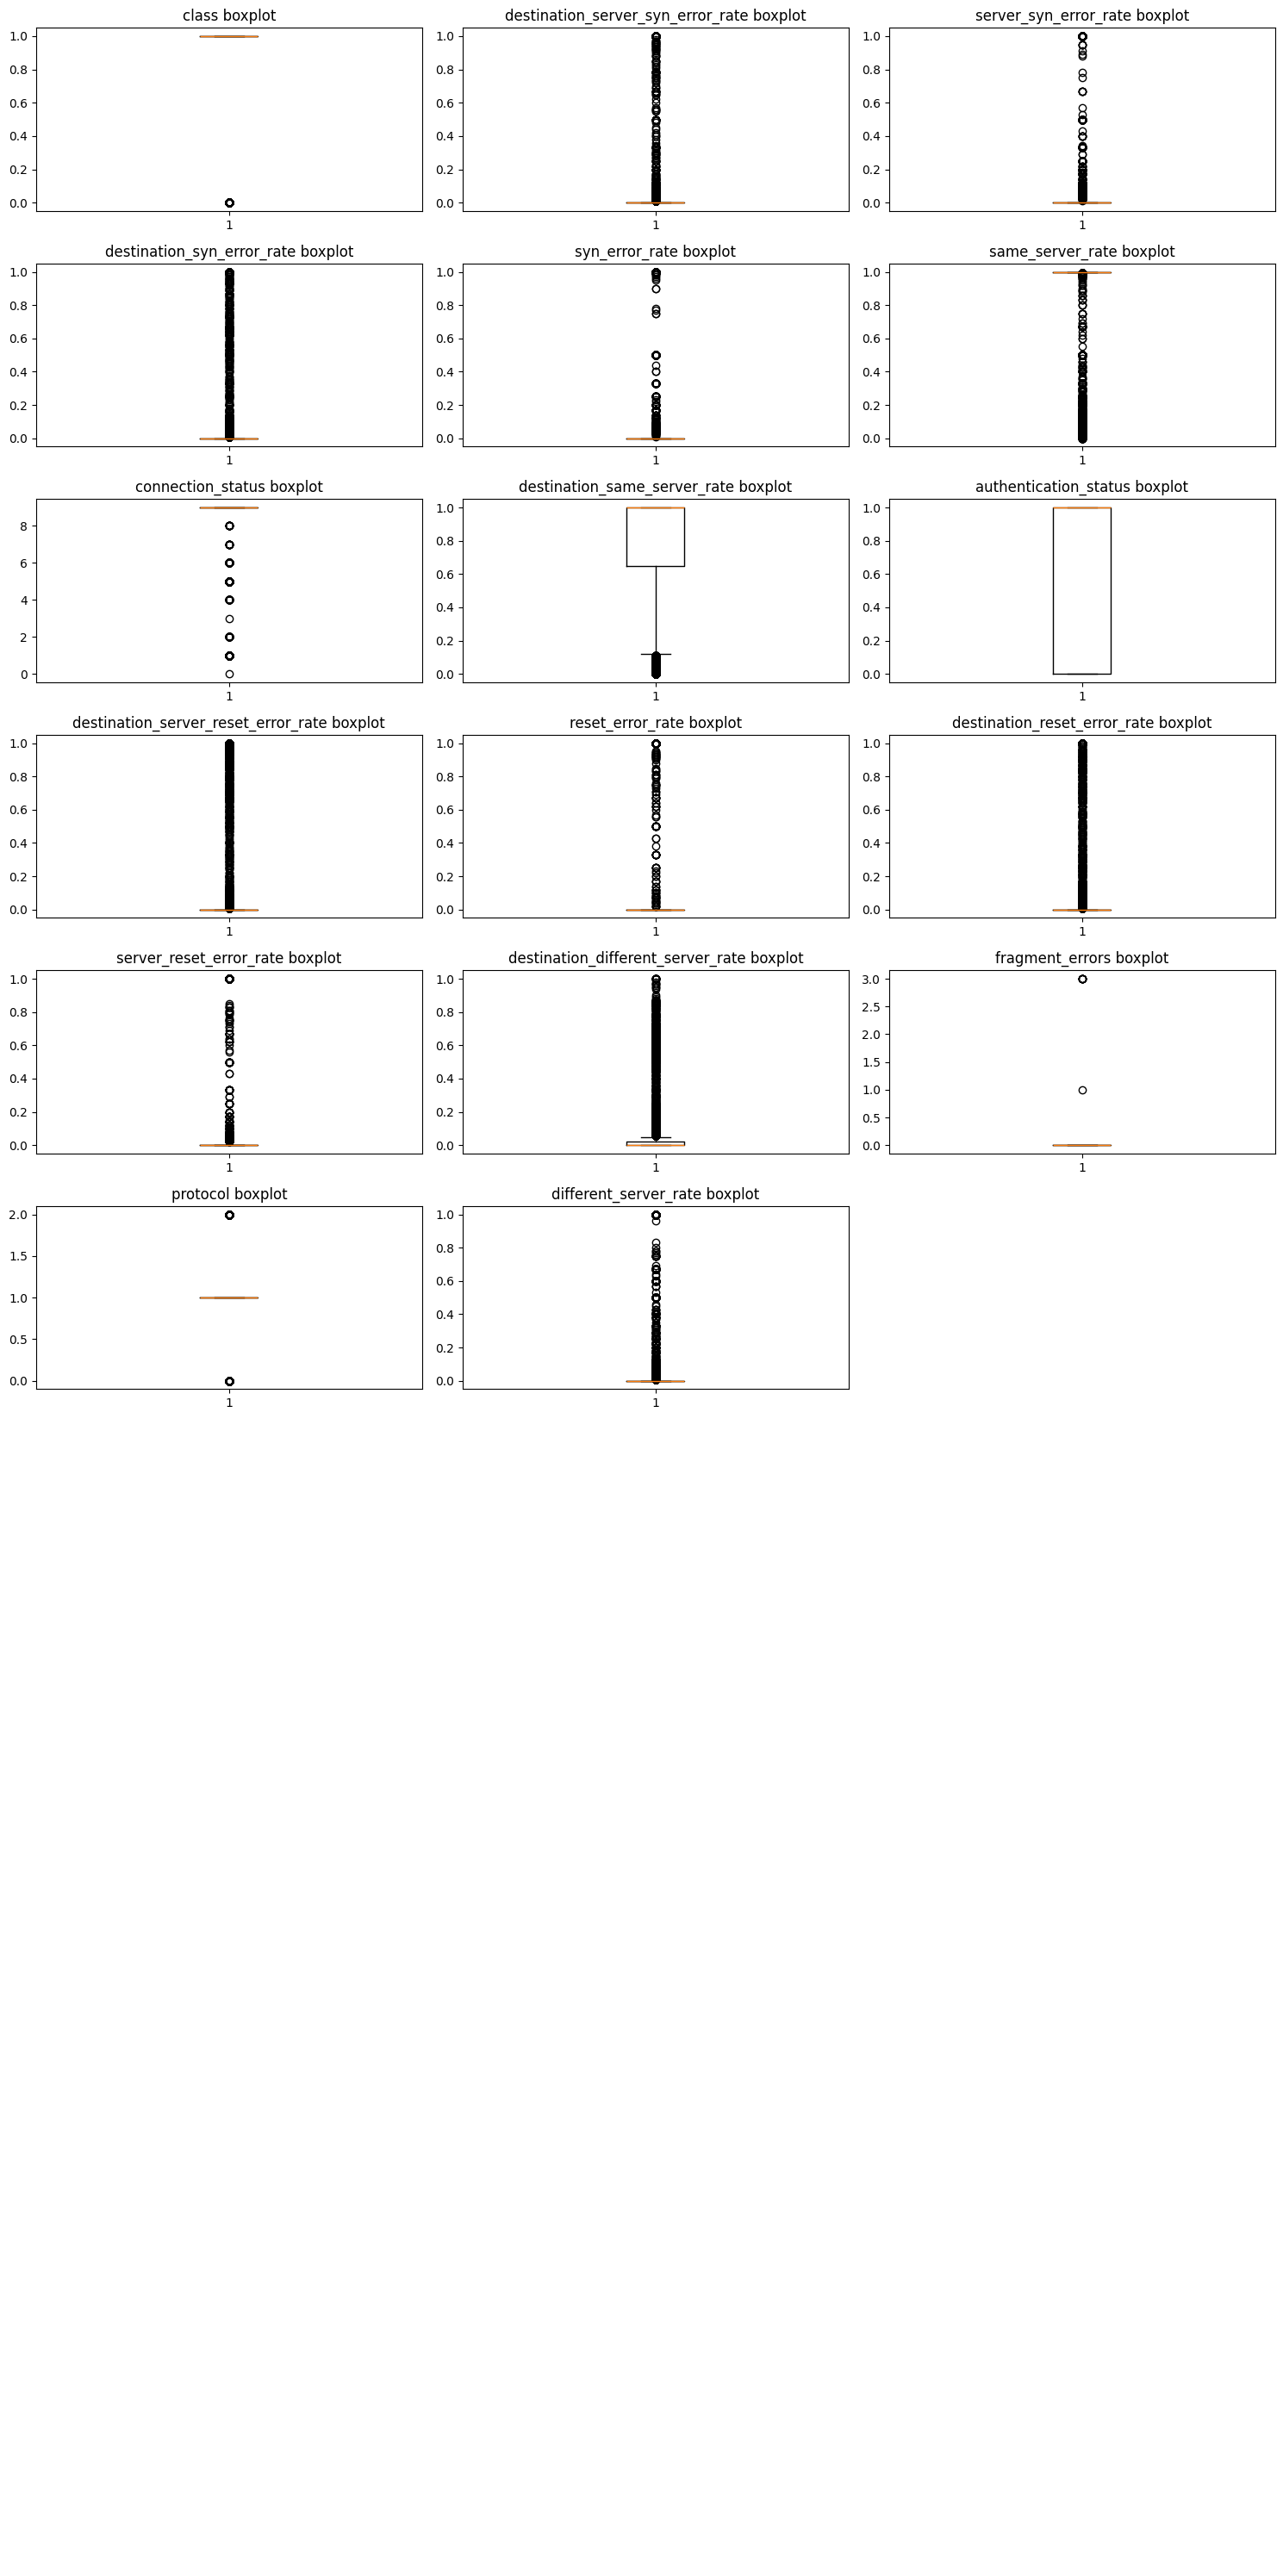

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(11, 3, figsize=(15, 30))
axes = axes.flatten()

for i in range(len(df2.columns)):
    axes[i].boxplot(df2[df2.columns[i]])
    axes[i].set_title(f"{df2.columns[i]} boxplot")

for j in range(len(df2.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# **Model implementation**

*   KNN
*   Linear Classifier
*   Ridge Classifier
*   Logistic regression
*   SVM
*   Decision tree
*   Random forest
*   Ensembling techniques (Voting, Bagging, Stacking)









In [ ]:
print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)

Training set size: (11228, 20)
Testing set size: (2808, 20)


In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy of KNN:", accuracy_knn)
precision_knn = precision_score(y_test, knn_pred)
print("Precision of KNN:", precision_knn)
recall_knn = recall_score(y_test, knn_pred)
print("Recall of KNN:", recall_knn)
f1_score_knn = f1_score(y_test, knn_pred)
print("F1 score of KNN:", f1_score_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_pred)
auc_knn = auc(recall_knn, precision_knn)
print("AUC of KNN:", auc_knn)
confusion_matrix_knn = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix of KNN:\n")
print(confusion_matrix_knn)

Accuracy of KNN: 0.9964387464387464
Precision of KNN: 0.9973938942665674
Recall of KNN: 0.9988814317673378
F1 score of KNN: 0.9981371087928465
AUC of KNN: 0.9986718510511406
Confusion Matrix of KNN:

[[ 119    7]
 [   3 2679]]


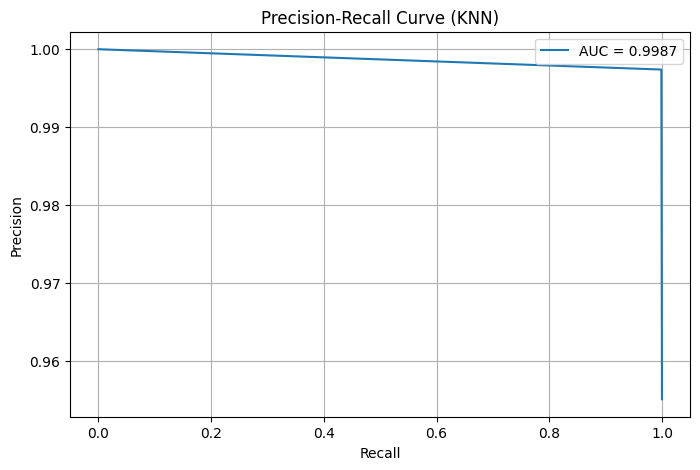

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(recall_knn, precision_knn, label=f'AUC = {auc_knn:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Linear Classifier
linear = LinearRegression()
linear.fit(x_train, y_train)
linear_pred_scores = linear.predict(x_test)
linear_pred = (linear_pred_scores >= 0.6).astype(int)
accuracy_linear = accuracy_score(y_test, linear_pred)
print("Accuracy of Linear Classifier:", accuracy_linear)
precision_linear = precision_score(y_test, linear_pred)
print("Precision of Linear Classifier:", precision_linear)
recall_linear = recall_score(y_test, linear_pred)
print("Recall of Linear Classifier:", recall_linear)
f1_score_linear = f1_score(y_test, linear_pred)
print("F1 score of Linear Classifier:", f1_score_linear)
precision_linear, recall_linear, _ = precision_recall_curve(y_test, linear_pred)
auc_linear = auc(recall_linear, precision_linear)
print("AUC of Linear Classifier:", auc_linear)
confusion_matrix_linear = confusion_matrix(y_test, linear_pred)
print("Confusion Matrix of Linear Classifier:")
print(confusion_matrix_linear)

Accuracy of Linear Classifier: 0.9886039886039886
Precision of Linear Classifier: 0.9911045218680504
Recall of Linear Classifier: 0.9970171513795675
F1 score of Linear Classifier: 0.9940520446096655
AUC of Linear Classifier: 0.9954853380483104
Confusion Matrix of Linear Classifier:
[[ 102   24]
 [   8 2674]]


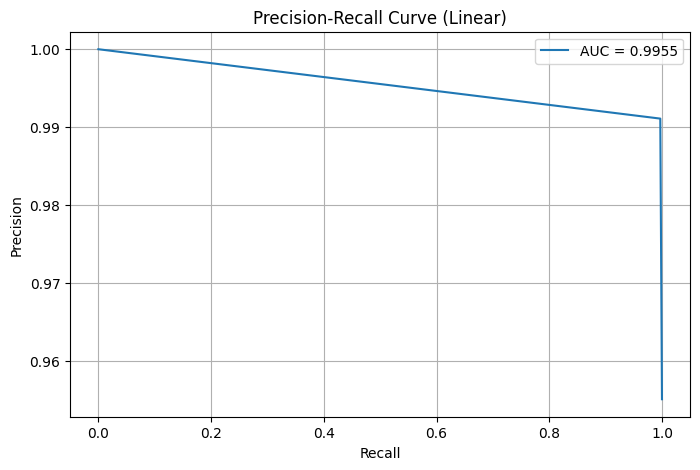

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(recall_linear, precision_linear, label=f'AUC = {auc_linear:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Linear)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Ridge regressor
ridge = RidgeClassifier(alpha=5)
ridge.fit(x_train, y_train)
ridge_pred_scores = ridge.predict(x_test)
ridge_pred = (ridge_pred_scores >= 0.6).astype(int)
accuracy_ridge = accuracy_score(y_test, ridge_pred)
print("Accuracy of Ridge regressor:", accuracy_ridge)
precision_ridge = precision_score(y_test, ridge_pred)
print("Precision of Ridge regressor:", precision_ridge)
recall_ridge = recall_score(y_test, ridge_pred)
print("Recall of Ridge regressor:", recall_ridge)
f1_score_ridge = f1_score(y_test, ridge_pred)
print("F1 score of Ridge regressor:", f1_score_ridge)
precision_ridge, recall_ridge, _ = precision_recall_curve(y_test, ridge_pred)
auc_ridge = auc(recall_ridge, precision_ridge)
print("AUC of Ridge regressor:", auc_ridge)
confusion_matrix_ridge = confusion_matrix(y_test, ridge_pred)
print("Confusion Matrix of Ridge regressor:")
print(confusion_matrix_ridge)

Accuracy of Ridge regressor: 0.9882478632478633
Precision of Ridge regressor: 0.9889258028792912
Recall of Ridge regressor: 0.9988814317673378
F1 score of Ridge regressor: 0.9938786867000556
AUC of Ridge regressor: 0.9944378053575025
Confusion Matrix of Ridge regressor:
[[  96   30]
 [   3 2679]]


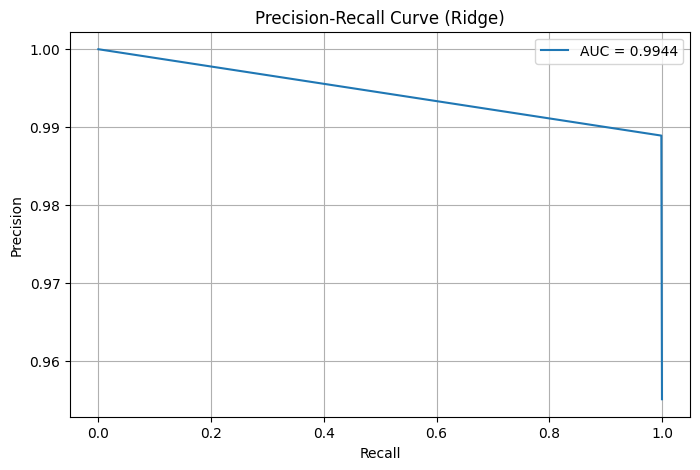

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(recall_ridge, precision_ridge, label=f'AUC = {auc_ridge:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Ridge)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Logistic regressor

logistic = LogisticRegressionCV(class_weight='balanced')
logistic.fit(x_train, y_train)
logistic_pred_scores = logistic.predict(x_test)
logistic_pred = (logistic_pred_scores >= 0.6).astype(int)
accuracy_logistic = accuracy_score(y_test, logistic_pred)
print("Accuracy of Logistic regressor:", accuracy_logistic)
precision_logistic = precision_score(y_test, logistic_pred)
print("Precision of Logistic regressor:", precision_logistic)
recall_logistic = recall_score(y_test, logistic_pred)
print("Recall of Logistic regressor:", recall_logistic)
f1_score_logistic = f1_score(y_test, logistic_pred)
print("F1 score of Logistic regressor:", f1_score_logistic)
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, logistic_pred)
auc_logistic = auc(recall_logistic, precision_logistic)
print("AUC of Logistic regressor:", auc_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, logistic_pred)
print("Confusion Matrix of Logistic regressor:")
print(confusion_matrix_logistic)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of Logistic regressor: 0.9615384615384616
Precision of Logistic regressor: 0.9965277777777778
Recall of Logistic regressor: 0.9630872483221476
F1 score of Logistic regressor: 0.9795221843003413
AUC of Logistic regressor: 0.9974357181781678
Confusion Matrix of Logistic regressor:
[[ 117    9]
 [  99 2583]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


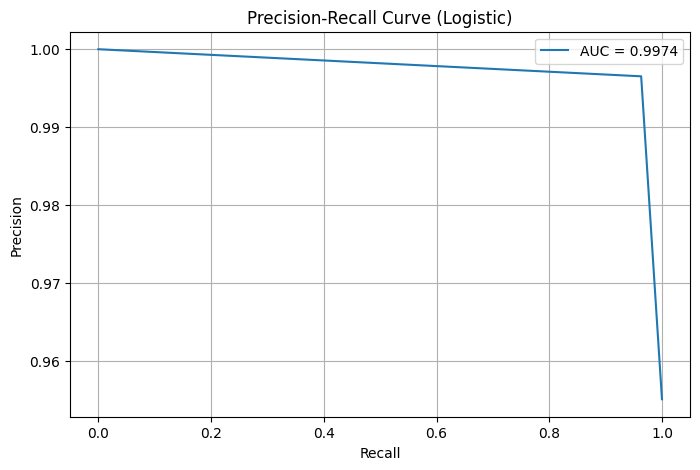

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(recall_logistic, precision_logistic, label=f'AUC = {auc_logistic:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#SVM
svm = SVC(class_weight='balanced',kernel="rbf",C=100,gamma=0.1)
svm.fit(x_train, y_train)

svm_pred_scores = svm.predict(x_test)

svm_pred = (svm_pred_scores >= 0.6).astype(int)

accuracy_svm = accuracy_score(y_test, svm_pred)
print("Accuracy of SVM:", accuracy_svm)

precision_svm = precision_score(y_test, svm_pred)
print("Precision of SVM:", precision_svm)

recall_svm = recall_score(y_test, svm_pred)
print("Recall of SVM:", recall_svm)

f1_score_svm = f1_score(y_test, svm_pred)
print("F1 score of SVM:", f1_score_svm)

precision_curve_svm, recall_curve_svm, _ = precision_recall_curve(y_test, svm_pred_scores)
auc_svm = auc(recall_curve_svm, precision_curve_svm)
print("AUC of SVM:", auc_svm)

confusion_matrix_svm = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix of SVM:")
print(confusion_matrix_svm)

Accuracy of SVM: 0.9882478632478633
Precision of SVM: 0.9981195938322678
Recall of SVM: 0.9895600298284862
F1 score of SVM: 0.9938213817637147
AUC of SVM: 0.998825566816132
Confusion Matrix of SVM:
[[ 121    5]
 [  28 2654]]


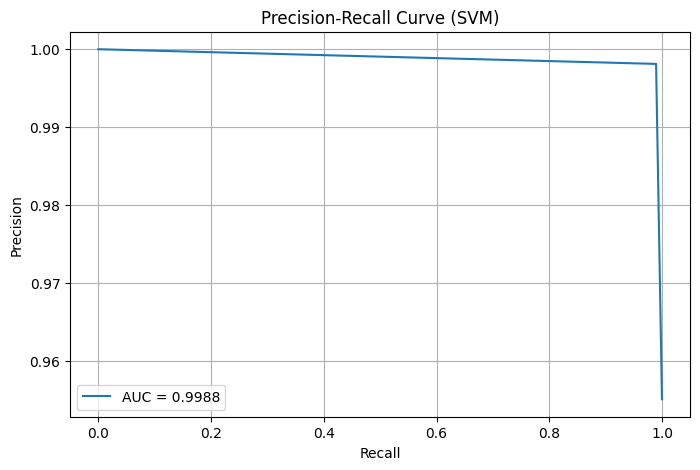

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(recall_curve_svm, precision_curve_svm, label=f'AUC = {auc_svm:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.legend()
plt.grid(True)
plt.show()

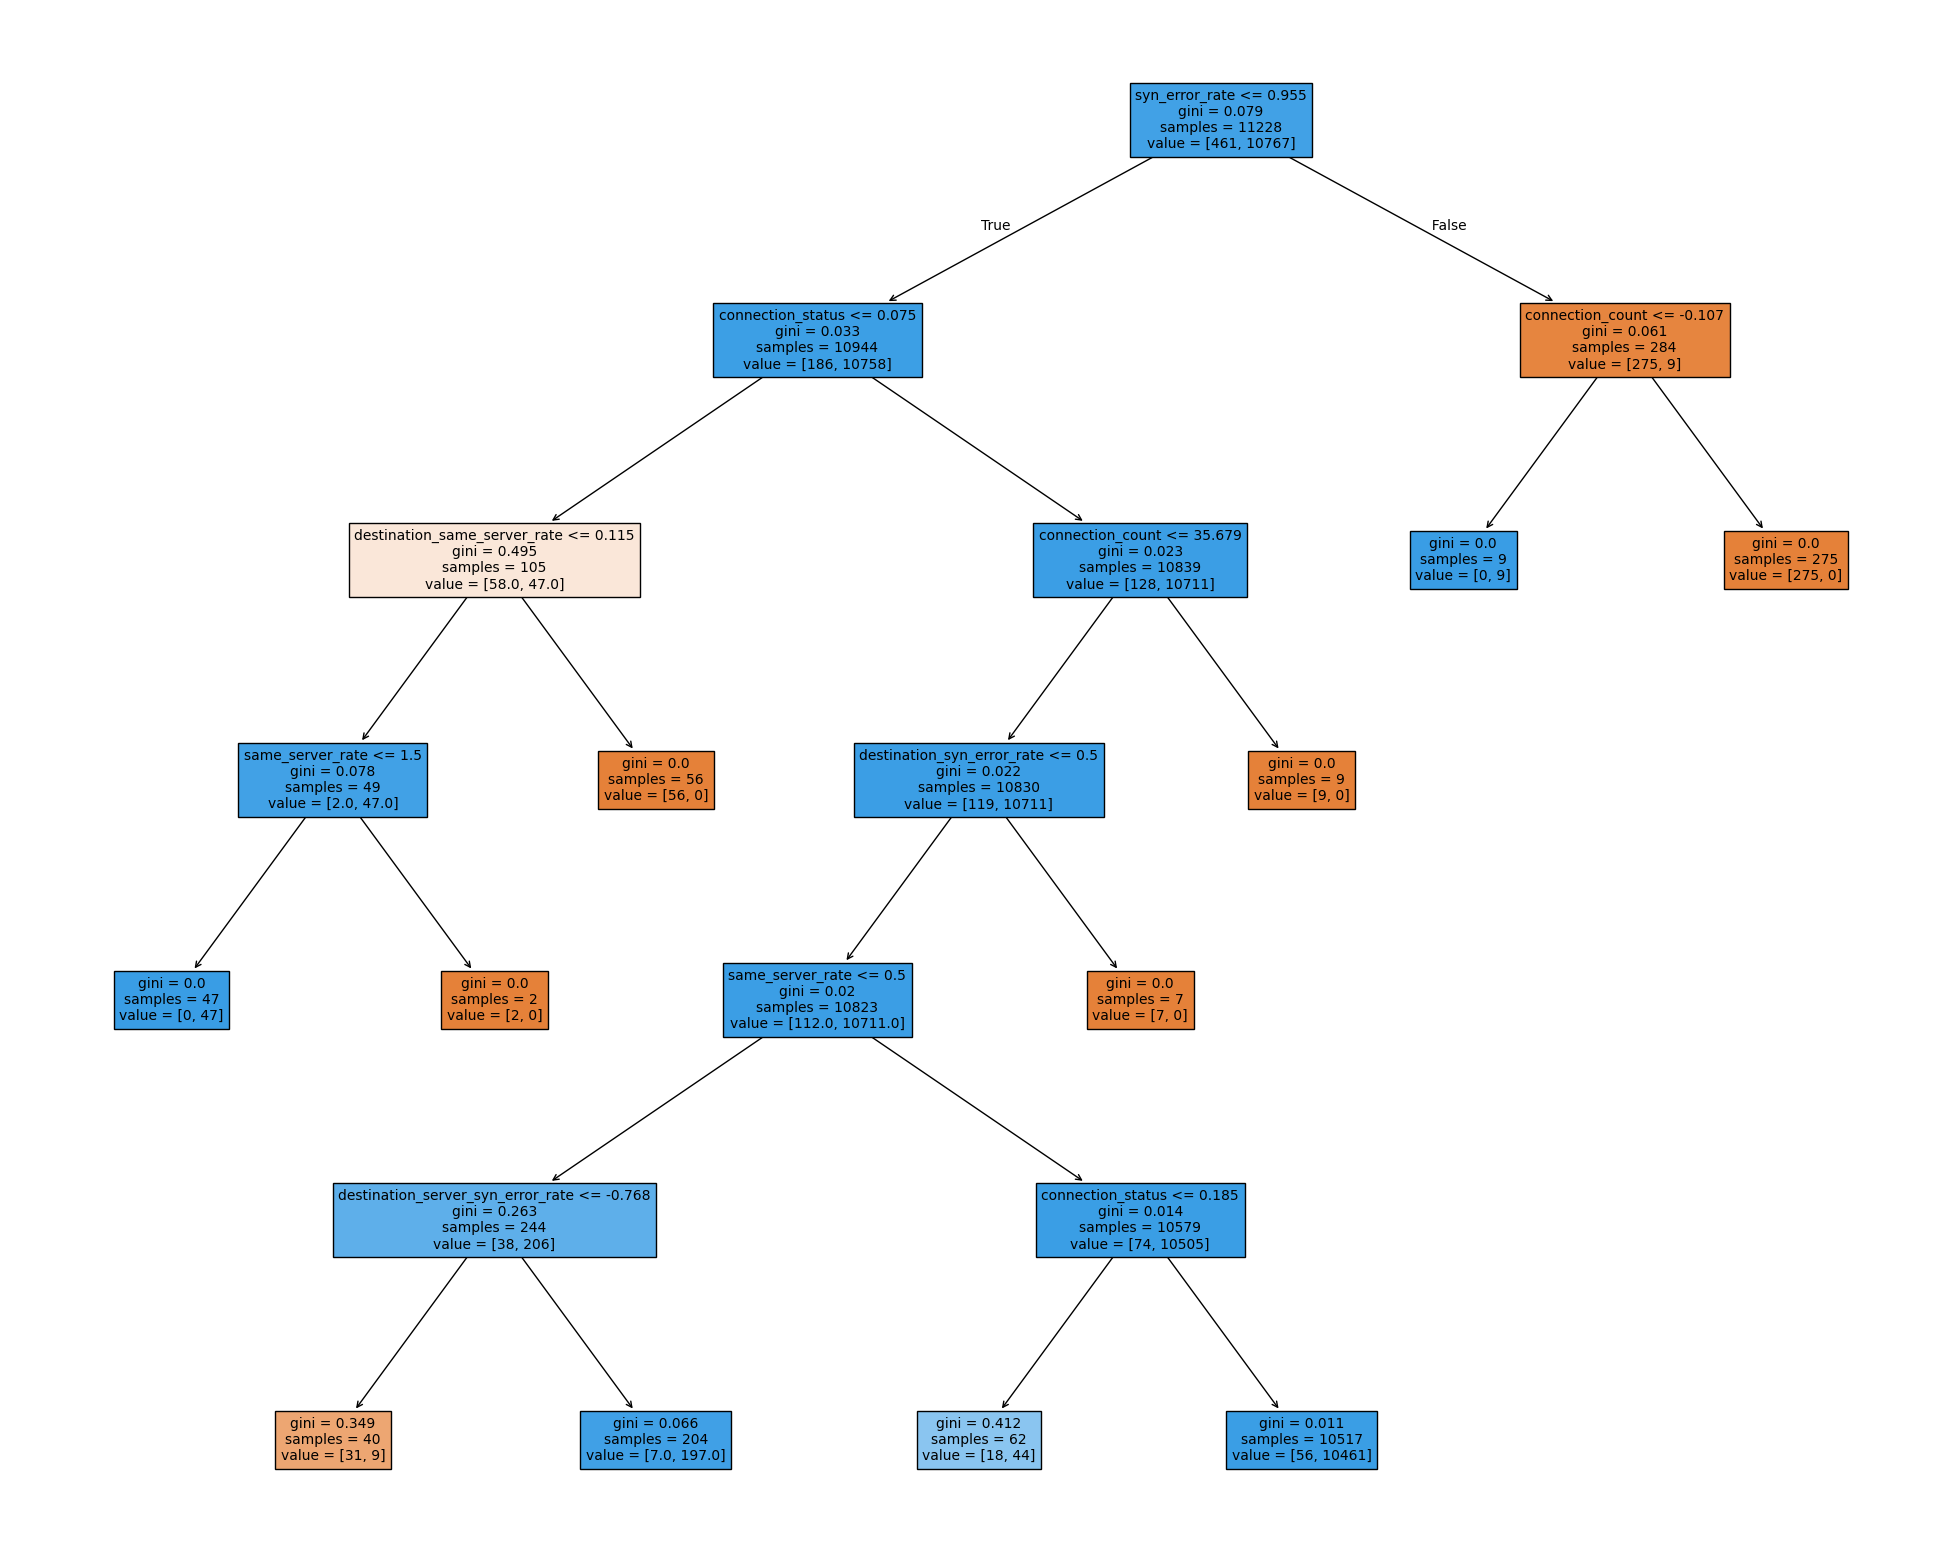

In [ ]:
# Decision tree
model = DecisionTreeClassifier(max_depth=6)
model.fit(x_train, y_train)
text_representation = tree.export_text(model)
plt.figure(figsize=(25,20))
tree.plot_tree(model, feature_names=df.columns, filled=True)
plt.show()

In [ ]:
tree_pred = model.predict(x_test)
accuracy_tree = accuracy_score(y_test, tree_pred)
print("Accuracy of Tree:", accuracy_tree)

precision_tree= precision_score(y_test, tree_pred)
print("Precision of Tree:", precision_tree)

recall_tree= recall_score(y_test, tree_pred)
print("Recall of Tree:", recall_tree)

f1_score_tree = f1_score(y_test, tree_pred)
print("F1 score of Tree:", f1_score_tree)

precision_curve_tree, recall_curve_tree, _ = precision_recall_curve(y_test, tree_pred)
auc_tree = auc(recall_curve_tree, precision_curve_tree)
print("AUC of Tree:", auc_tree)

confusion_matrix_tree = confusion_matrix(y_test, tree_pred)
print("Confusion Matrix of Tree:")
print(confusion_matrix_tree)

Accuracy of Tree: 0.9921652421652422
Precision of Tree: 0.9922279792746114
Recall of Tree: 0.9996271439224459
F1 score of Tree: 0.9959138187221397
AUC of Tree: 0.9961056242765913
Confusion Matrix of Tree:
[[ 105   21]
 [   1 2681]]


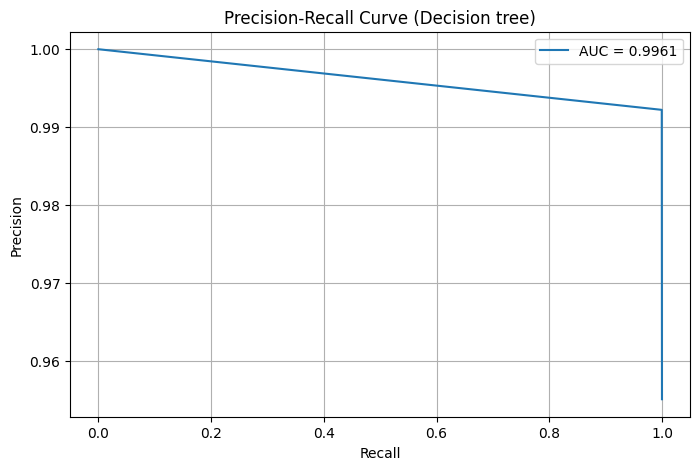

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(recall_curve_tree, precision_curve_tree, label=f'AUC = {auc_tree:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Decision tree)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train, y_train)


y_pred_Forest= rf_classifier.predict(x_test)


accuracy_randomforest = accuracy_score(y_test, y_pred_Forest)
print("Accuracy of randomforest:", accuracy_randomforest)

precision_randomforest= precision_score(y_test, y_pred_Forest)
print("Precision of randomforest:", precision_randomforest)

recall_randomforest= recall_score(y_test, y_pred_Forest)
print("Recall of randomforest:", recall_randomforest)

f1_score_randomforest = f1_score(y_test, y_pred_Forest)
print("F1 score of randomforest:", f1_score_randomforest)

precision_curve_randomforest, recall_curve_randomforest, _ = precision_recall_curve(y_test, y_pred_Forest)
auc_randomforest = auc(recall_curve_randomforest, precision_curve_randomforest)
print("AUC of randomforest:", auc_randomforest)

confusion_matrix_randomforest = confusion_matrix(y_test, y_pred_Forest)
print("Confusion Matrix of randomforest:")
print("\n",confusion_matrix_randomforest)

Accuracy of randomforest: 0.9967948717948718
Precision of randomforest: 0.9966555183946488
Recall of randomforest: 1.0
F1 score of randomforest: 0.998324958123953
AUC of randomforest: 0.9983277591973244
Confusion Matrix of randomforest:

 [[ 117    9]
 [   0 2682]]


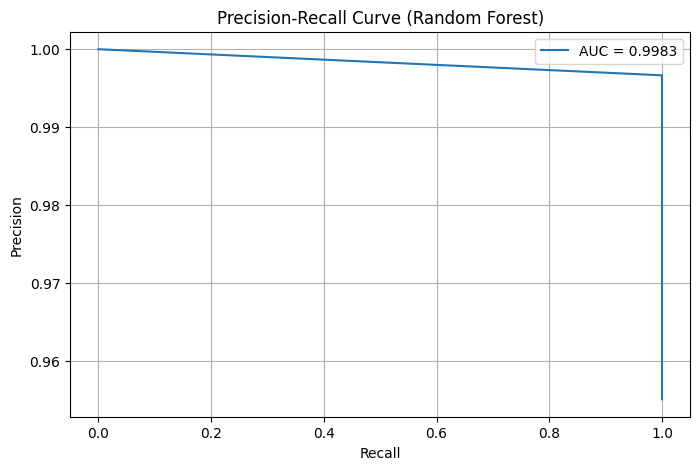

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(recall_curve_randomforest, precision_curve_randomforest, label=f'AUC = {auc_randomforest:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Accuracy of KNN:", accuracy_knn)
print("Accuracy of Linear Classifier:", accuracy_linear)
print("Accuracy of Ridge regressor:", accuracy_ridge)
print("Accuracy of Logistic regressor:", accuracy_logistic)
print("Accuracy of SVM:", accuracy_svm)
print("Accuracy of Tree:", accuracy_tree)
print("Accuracy of randomforest:", accuracy_randomforest)


Accuracy of KNN: 0.9964387464387464
Accuracy of Linear Classifier: 0.9886039886039886
Accuracy of Ridge regressor: 0.9882478632478633
Accuracy of Logistic regressor: 0.9615384615384616
Accuracy of SVM: 0.9882478632478633
Accuracy of Tree: 0.9921652421652422
Accuracy of randomforest: 0.9967948717948718


# **Ensembling**

In [ ]:
# Voting
from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier
clf1= LogisticRegression(max_iter = 1000, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier(n_neighbors = 5)
clf4 = SVC(class_weight='balanced', probability=True)
clf5 = RandomForestClassifier(n_estimators=100)
voting_hard = VotingClassifier(estimators=[
    ("lr", clf1),
    ("dt", clf2),
    ("knn", clf3),
    ("svm", clf4),
    ("rf", clf5)
    ],
    voting= "hard"
)

voting_soft = VotingClassifier(estimators=[
    ("lr", clf1),
    ("dt", clf2),
    ("knn", clf3),
    ("svm", clf4),
    ("rf", clf5)],
    voting= "soft"
)

voting_hard.fit(x_train, y_train)
voting_soft.fit(x_train, y_train)

y_pred_soft = voting_soft.predict(x_test)
y_pred_hard = voting_hard.predict(x_test)

In [ ]:
accuracy_voting_soft = accuracy_score(y_pred_soft, y_test)
accuracy_voting_hard = accuracy_score(y_pred_hard, y_test)
print(f"Accuracy of Soft voting: {accuracy_voting_soft}")
print(f"Accuracy of Hard voting: {accuracy_voting_hard}")


Accuracy of Soft voting: 0.9957264957264957
Accuracy of Hard voting: 0.9960826210826211


In [ ]:
#Bagging
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(random_state=42)
clf_bagging = BaggingClassifier(estimator=tree, n_estimators=100,random_state = 42)
clf_bagging.fit(x_train, y_train)
y_pred_bagging= clf_bagging.predict(x_test)
accuracy_bagging = accuracy_score(y_pred_bagging, y_test)
print(f"Accuracy of Bagging: {accuracy_bagging}")

Accuracy of Bagging: 0.9971509971509972


In [ ]:
#Stacking
from sklearn.ensemble import StackingClassifier
clf1= LogisticRegression(max_iter = 1000, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier(n_neighbors = 5)
clf4 = SVC(class_weight='balanced', probability=True)
clf5 = RidgeClassifier(alpha=5)
base_models=[
    ("lr", clf1),
    ("dt", clf2),
    ("knn", clf3),
    ("svm", clf4),
    ("rf", clf5)
]
meta_model = RandomForestClassifier(n_estimators=100)
stacking = StackingClassifier(estimators= base_models, final_estimator= meta_model, cv=5)
stacking.fit(x_train, y_train)
y_pred_stack = stacking.predict(x_test)
accuracy_stacking = accuracy_score(y_pred_stack, y_test)
print(f"Accuracy of Stacking: {accuracy_stacking}")


Accuracy of Stacking: 0.9971509971509972


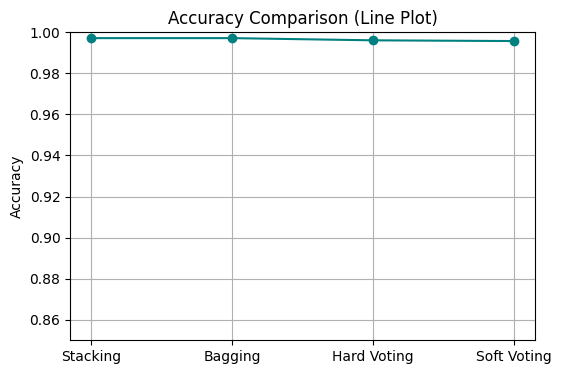

In [ ]:
accuracies = {
    "Stacking": accuracy_stacking,
    "Bagging": accuracy_bagging,
    "Hard Voting": accuracy_voting_hard,
    "Soft Voting": accuracy_voting_soft
}
labels = list(accuracies.keys())
values = list(accuracies.values())

plt.figure(figsize=(6, 4))
plt.plot(labels, values, marker='o', linestyle='-', color='teal')
plt.title("Accuracy Comparison (Line Plot)")
plt.ylabel("Accuracy")
plt.ylim(0.85, 1.0)
plt.grid(True)
plt.show()

# **Sampling up (SMOT)**

In [ ]:
df3 = df_cleaned_global.copy(deep=True)
x = df3.drop(["class"], axis=1)
y = df3["class"]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
scaled_columns_train= x_train[["destination_host_count","destination_host_server_count","connection_count", "service_type"]]
scaled_columns_val= x_val[["destination_host_count","destination_host_server_count","connection_count", "service_type"]]
scaled_columns_test= x_test[["destination_host_count","destination_host_server_count","connection_count", "service_type"]]
robust.fit(scaled_columns_train)

RobustScaler()

In [ ]:
x_train_scaled=robust.transform(scaled_columns_train)
x_val_scaled=robust.transform(scaled_columns_val)
x_test_scaled=robust.transform(scaled_columns_test)

In [ ]:
df3.drop(["destination_host_count","destination_host_server_count","connection_count","service_type"], axis=1, inplace=True)

In [ ]:
x_train.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_train_scaled
x_val.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_val_scaled
x_test.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_test_scaled

<ipython-input-56-9aefa3c42dba>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.53773585  0.41037736 -0.0754717  ... -0.22641509  0.41037736
 -0.06603774]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_train_scaled
<ipython-input-56-9aefa3c42dba>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.34545455 -1.52121212 -0.86666667 ... -1.34545455  0.00606061
 -1.12121212]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_train_scaled
<ipython-input-56-9aefa3c42dba>:1: FutureWarning: Setting an item of incompatible dtype is deprecated an

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
yes=0
no=0
for i in y_train_resampled:
  if (y_train_resampled[i]==0):
    yes+=1
  else:
      no+=1
print(yes,no)

9423 9423


Accuracy of KNN after SMOTING: 0.9886039886039886
Precision of KNN after SMOTING: 0.9975062344139651
Recall of KNN after SMOTING: 0.9905894006934126
F1 score of KNN after SMOTING: 0.9940357852882704
AUC of KNN after SMOTING: 0.9985587387312768
Confusion Matrix of KNN after SMOTING:
[[  82    5]
 [  19 2000]]


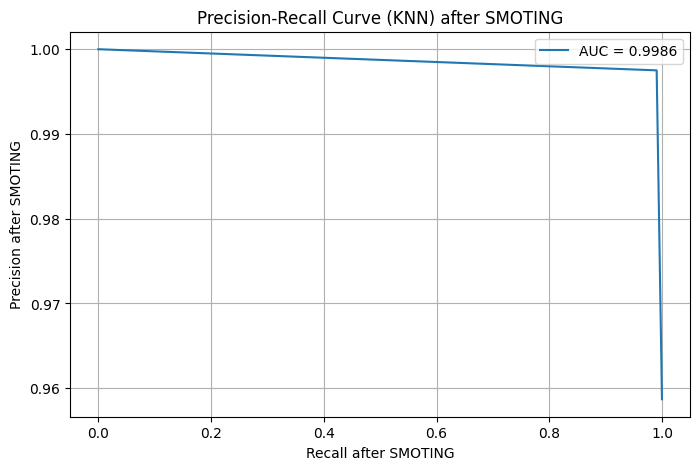

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_resampled, y_train_resampled)
knn_pred = knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy of KNN after SMOTING:", accuracy_knn)
precision_knn = precision_score(y_test, knn_pred)
print("Precision of KNN after SMOTING:", precision_knn)
recall_knn = recall_score(y_test, knn_pred)
print("Recall of KNN after SMOTING:", recall_knn)
f1_score_knn = f1_score(y_test, knn_pred)
print("F1 score of KNN after SMOTING:", f1_score_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_pred)
auc_knn = auc(recall_knn, precision_knn)
print("AUC of KNN after SMOTING:", auc_knn)
confusion_matrix_knn = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix of KNN after SMOTING:")
print(confusion_matrix_knn)



plt.figure(figsize=(8, 5))
plt.plot(recall_knn, precision_knn, label=f'AUC = {auc_knn:.4f}')
plt.xlabel('Recall after SMOTING')
plt.ylabel('Precision after SMOTING')
plt.title('Precision-Recall Curve (KNN) after SMOTING')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# #Linear Classifier
# linear = LinearRegression()
# linear.fit(x_train_resampled, y_train_resampled)
# linear_pred_scores = linear.predict(x_test_resampled)
# linear_pred = (linear_pred_scores >= 0.6).astype(int)
# accuracy_linear = accuracy_score(y_test_resampled, linear_pred)
# print("Accuracy of Linear Classifier:", accuracy_linear)
# precision_linear = precision_score(y_test_resampled, linear_pred)
# print("Precision of Linear Classifier:", precision_linear)
# recall_linear = recall_score(y_test_resampled, linear_pred)
# print("Recall of Linear Classifier:", recall_linear)
# f1_score_linear = f1_score(y_test_resampled, linear_pred)
# print("F1 score of Linear Classifier:", f1_score_linear)
# precision_linear, recall_linear, _ = precision_recall_curve(y_test_resampled, linear_pred)
# auc_linear = auc(recall_linear, precision_linear)
# print("AUC of Linear Classifier:", auc_linear)
# confusion_matrix_linear = confusion_matrix(y_test_resampled, linear_pred)
# print("Confusion Matrix of Linear Classifier:")
# print(confusion_matrix_linear)


# plt.figure(figsize=(8, 5))
# plt.plot(recall_linear, precision_linear, label=f'AUC = {auc_linear:.2f}')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve (Linear)')
# plt.legend()
# plt.grid(True)
# plt.show()

Accuracy of Ridge regressor: 0.9586894586894587
Precision of Ridge regressor: 0.9958932238193019
Recall of Ridge regressor: 0.9608717186726102
F1 score of Ridge regressor: 0.978069069826065
AUC of Ridge regressor: 0.9971384066685581
Confusion Matrix of Ridge regressor:
[[  79    8]
 [  79 1940]]


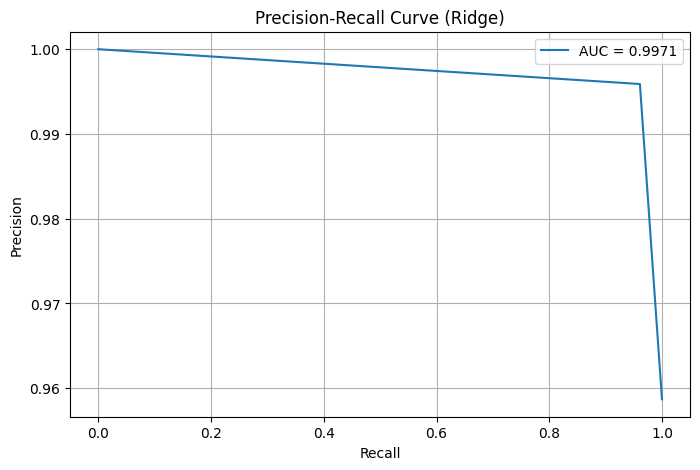

In [ ]:
# Ridge regressor
ridge = RidgeClassifier(alpha=5)
ridge.fit(x_train_resampled, y_train_resampled)
ridge_pred_scores = ridge.predict(x_test)

ridge_pred = (ridge_pred_scores >= 0.6).astype(int)
accuracy_ridge = accuracy_score(y_test, ridge_pred)
print("Accuracy of Ridge regressor:", accuracy_ridge)
precision_ridge = precision_score(y_test, ridge_pred)
print("Precision of Ridge regressor:", precision_ridge)
recall_ridge = recall_score(y_test, ridge_pred)
print("Recall of Ridge regressor:", recall_ridge)
f1_score_ridge = f1_score(y_test, ridge_pred)
print("F1 score of Ridge regressor:", f1_score_ridge)
precision_ridge, recall_ridge, _ = precision_recall_curve(y_test, ridge_pred)
auc_ridge = auc(recall_ridge, precision_ridge)
print("AUC of Ridge regressor:", auc_ridge)
confusion_matrix_ridge = confusion_matrix(y_test, ridge_pred)
print("Confusion Matrix of Ridge regressor:")
print(confusion_matrix_ridge)



plt.figure(figsize=(8, 5))
plt.plot(recall_ridge, precision_ridge, label=f'AUC = {auc_ridge:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Ridge)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of Logistic regressor: 0.9601139601139601
Precision of Logistic regressor: 0.9953917050691244
Recall of Logistic regressor: 0.962852897473997
F1 score of Logistic regressor: 0.9788519637462235
AUC of Logistic regressor: 0.9969285690778287
Confusion Matrix of Logistic regressor:
[[  78    9]
 [  75 1944]]


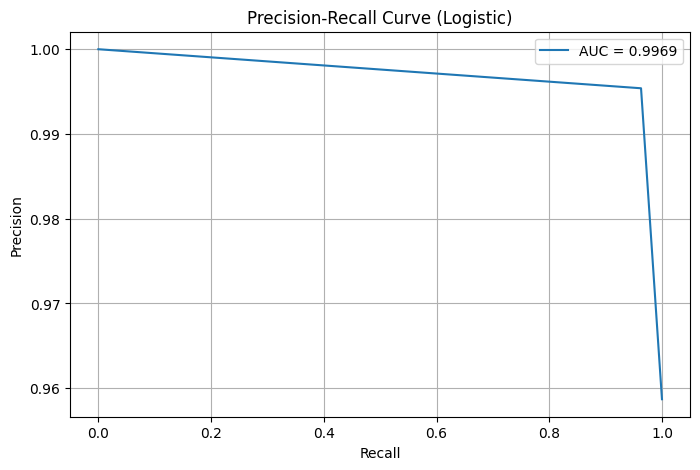

In [ ]:
# Logistic regressor
logistic = LogisticRegressionCV(class_weight='balanced')
logistic.fit(x_train_resampled, y_train_resampled)
logistic_pred_scores = logistic.predict(x_test)

logistic_pred = (logistic_pred_scores >= 0.6).astype(int)
accuracy_logistic = accuracy_score(y_test, logistic_pred)
print("Accuracy of Logistic regressor:", accuracy_logistic)
precision_logistic = precision_score(y_test, logistic_pred)
print("Precision of Logistic regressor:", precision_logistic)
recall_logistic = recall_score(y_test, logistic_pred)
print("Recall of Logistic regressor:", recall_logistic)
f1_score_logistic = f1_score(y_test, logistic_pred)
print("F1 score of Logistic regressor:", f1_score_logistic)
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, logistic_pred)
auc_logistic = auc(recall_logistic, precision_logistic)
print("AUC of Logistic regressor:", auc_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, logistic_pred)
print("Confusion Matrix of Logistic regressor:")
print(confusion_matrix_logistic)



plt.figure(figsize=(8, 5))
plt.plot(recall_logistic, precision_logistic, label=f'AUC = {auc_logistic:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic)')
plt.legend()
plt.grid(True)
plt.show()

Accuracy of SVM: 0.9890788224121557
Precision of SVM: 0.9970119521912351
Recall of SVM: 0.991579990094106
F1 score of SVM: 0.994288552272163
AUC of SVM: 0.9983320585120912
Confusion Matrix of SVM:
[[  81    6]
 [  17 2002]]


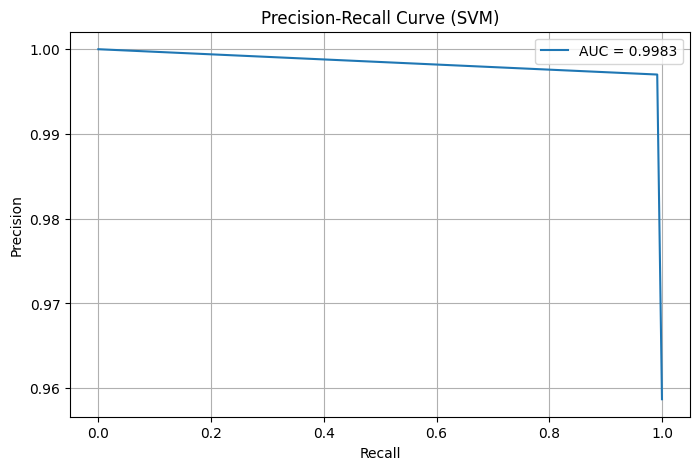

In [ ]:
#SVM
svm = SVC(class_weight='balanced',kernel="rbf",C=100,gamma=0.1)
svm.fit(x_train_resampled, y_train_resampled)

svm_pred_scores = svm.predict(x_test)

svm_pred = (svm_pred_scores >= 0.6).astype(int)

accuracy_svm = accuracy_score(y_test, svm_pred)
print("Accuracy of SVM:", accuracy_svm)

precision_svm = precision_score(y_test, svm_pred)
print("Precision of SVM:", precision_svm)

recall_svm = recall_score(y_test, svm_pred)
print("Recall of SVM:", recall_svm)

f1_score_svm = f1_score(y_test, svm_pred)
print("F1 score of SVM:", f1_score_svm)

precision_curve_svm, recall_curve_svm, _ = precision_recall_curve(y_test, svm_pred_scores)
auc_svm = auc(recall_curve_svm, precision_curve_svm)
print("AUC of SVM:", auc_svm)

confusion_matrix_svm = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix of SVM:")
print(confusion_matrix_svm)




plt.figure(figsize=(8, 5))
plt.plot(recall_curve_svm, precision_curve_svm, label=f'AUC = {auc_svm:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.legend()
plt.grid(True)
plt.show()

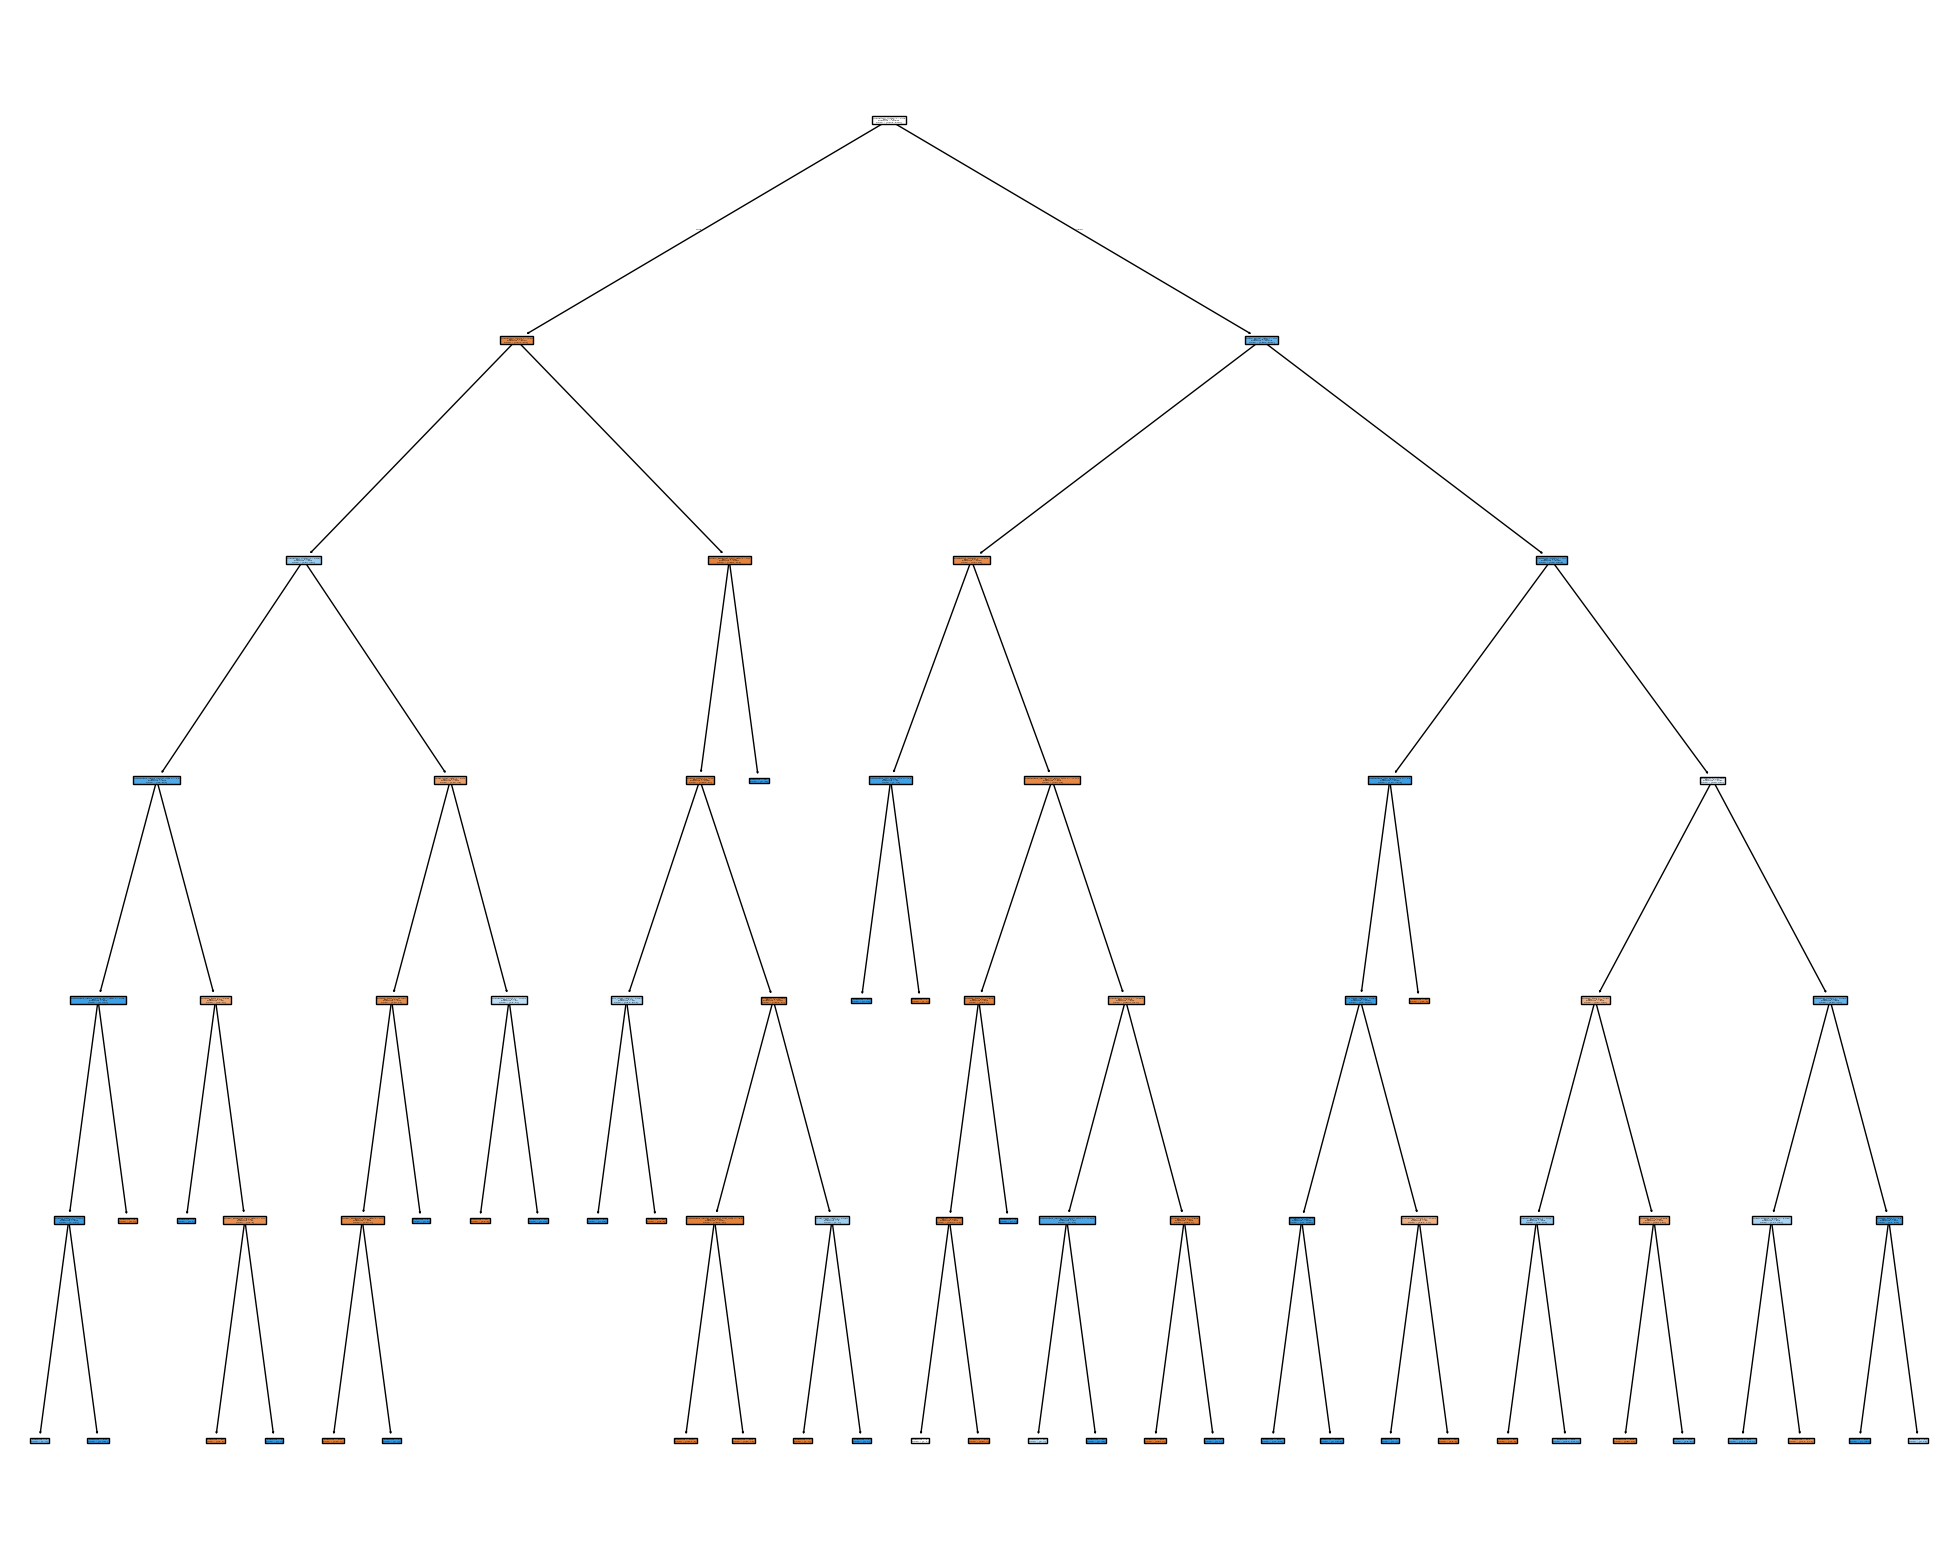

In [ ]:
# Decision tree
from sklearn import tree
model = DecisionTreeClassifier(max_depth=6)
model.fit(x_train_resampled, y_train_resampled)
text_representation = tree.export_text(model)
plt.figure(figsize=(25,20))
tree.plot_tree(model, feature_names=df.columns, filled=True)
plt.show()

Accuracy of Tree: 0.9843304843304843
Precision of Tree: 0.9950149551345963
Recall of Tree: 0.9886082218920258
F1 score of Tree: 0.9918012422360248
AUC of Tree: 0.997272177307233
Confusion Matrix of Tree:
[[  77   10]
 [  23 1996]]


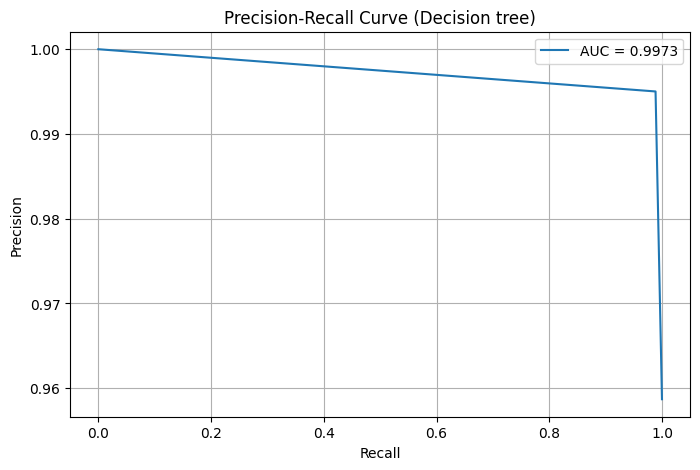

In [ ]:
tree_pred = model.predict(x_test)
accuracy_tree = accuracy_score(y_test, tree_pred)
print("Accuracy of Tree:", accuracy_tree)

precision_tree= precision_score(y_test, tree_pred)
print("Precision of Tree:", precision_tree)

recall_tree= recall_score(y_test, tree_pred)
print("Recall of Tree:", recall_tree)

f1_score_tree = f1_score(y_test, tree_pred)
print("F1 score of Tree:", f1_score_tree)

precision_curve_tree, recall_curve_tree, _ = precision_recall_curve(y_test, tree_pred)
auc_tree = auc(recall_curve_tree, precision_curve_tree)
print("AUC of Tree:", auc_tree)

confusion_matrix_tree = confusion_matrix(y_test, tree_pred)
print("Confusion Matrix of Tree:")
print(confusion_matrix_tree)


plt.figure(figsize=(8, 5))
plt.plot(recall_curve_tree, precision_curve_tree, label=f'AUC = {auc_tree:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Decision tree)')
plt.legend()
plt.grid(True)
plt.show()

Accuracy of randomforest: 0.99667616334283
Precision of randomforest: 0.9975272007912958
Recall of randomforest: 0.9990094105993066
F1 score of randomforest: 0.9982677555060628
AUC of randomforest: 0.9987431395034684
Confusion Matrix of randomforest:

 [[  82    5]
 [   2 2017]]


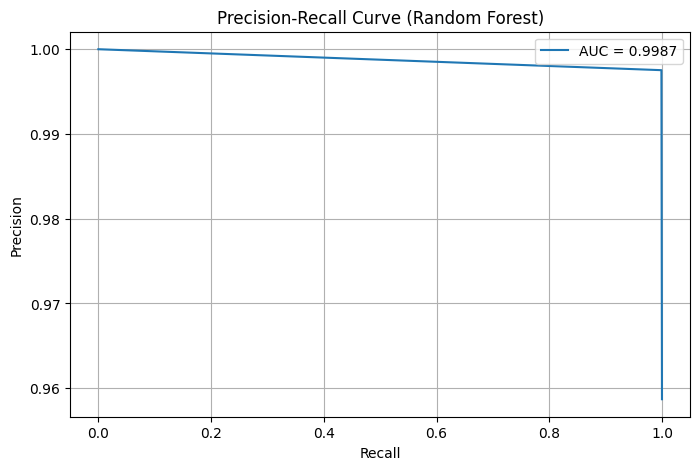

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train_resampled, y_train_resampled)


y_pred_Forest= rf_classifier.predict(x_test)


accuracy_randomforest = accuracy_score(y_test, y_pred_Forest)
print("Accuracy of randomforest:", accuracy_randomforest)

precision_randomforest= precision_score(y_test, y_pred_Forest)
print("Precision of randomforest:", precision_randomforest)

recall_randomforest= recall_score(y_test, y_pred_Forest)
print("Recall of randomforest:", recall_randomforest)

f1_score_randomforest = f1_score(y_test, y_pred_Forest)
print("F1 score of randomforest:", f1_score_randomforest)

precision_curve_randomforest, recall_curve_randomforest, _ = precision_recall_curve(y_test, y_pred_Forest)
auc_randomforest = auc(recall_curve_randomforest, precision_curve_randomforest)
print("AUC of randomforest:", auc_randomforest)

confusion_matrix_randomforest = confusion_matrix(y_test, y_pred_Forest)
print("Confusion Matrix of randomforest:")
print("\n",confusion_matrix_randomforest)


plt.figure(figsize=(8, 5))
plt.plot(recall_curve_randomforest, precision_curve_randomforest, label=f'AUC = {auc_randomforest:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


# **Models Validation check by SMOT**



In [ ]:
"""---------------------------------------------------------------------------KNN-----------------------------------------------------------------------------------------------"""
train_acc = []
val_acc = []
test_acc = []

for i in range(1, 21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_resampled, y_train_resampled)
    train_acc.append(accuracy_score(y_train_resampled, clf.predict(x_train_resampled)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))




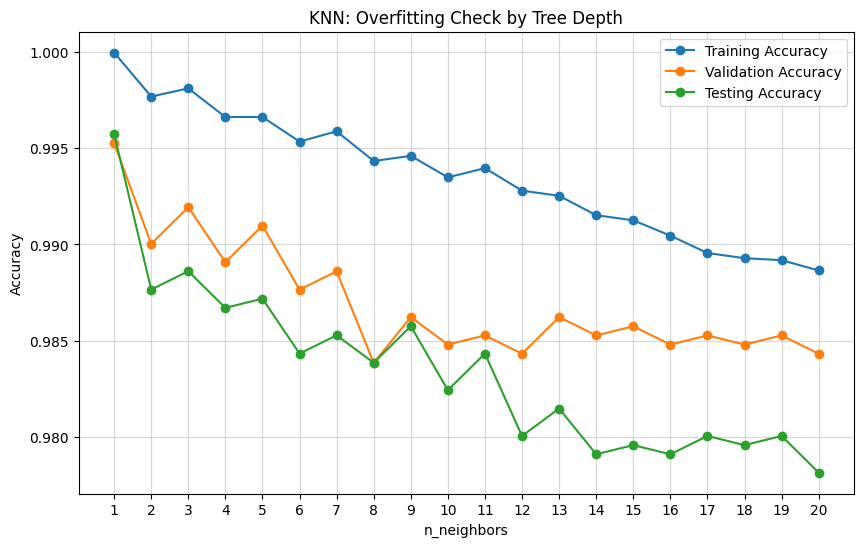

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_acc,label="Training Accuracy",marker='o')
plt.plot(range(1, 21), val_acc,label="Validation Accuracy",marker='o')
plt.plot(range(1, 21), test_acc, label="Testing Accuracy",marker='o')

plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Overfitting Check by Tree Depth")
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True,alpha=0.5)
plt.show()

In [ ]:
# Linear classifier validation

In [ ]:
#Ridge Regression
train_acc = []
val_acc = []
test_acc = []

alpha_values=[]
for i in range(1,70):
  alpha_values.append(i)

for al in alpha_values:
    clf = RidgeClassifier(alpha=al)
    clf.fit(x_train_resampled, y_train_resampled)

    train_acc.append(accuracy_score(y_train_resampled, clf.predict(x_train_resampled)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))

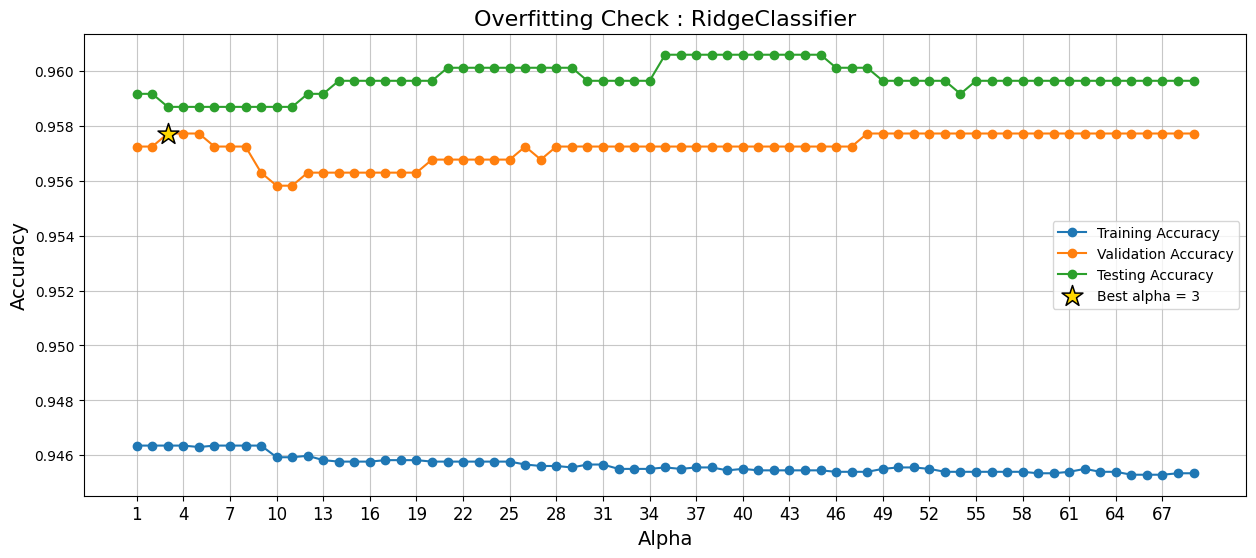

In [ ]:
best_index = np.argmax(val_acc)
best_alpha = alpha_values[best_index]
best_val = val_acc[best_index]

plt.figure(figsize=(15,6))
plt.plot(alpha_values, train_acc, label="Training Accuracy", marker='o')
plt.plot(alpha_values, val_acc, label="Validation Accuracy", marker='o')
plt.plot(alpha_values, test_acc, label="Testing Accuracy", marker='o')

plt.scatter(best_alpha, best_val, color='gold',marker='*' ,s=250, edgecolors='black',linewidths=1.1, zorder=5, label=f'Best alpha = {best_alpha}')

plt.xlabel("Alpha",fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Overfitting Check : RidgeClassifier", fontsize=16)

plt.xticks(np.arange(1,70,step=3),fontsize=12)
plt.legend()
plt.grid(True,alpha=0.7)
plt.show()

In [ ]:
"""--------------------------------------------------------------------------LOGISTIC-----------------------------------------------------------------------------------------"""
train_acc = []
val_acc = []
test_acc = []


max_itterations=[]
for i in range(0,7):
  max_itterations.append(10**i)


for max_i in max_itterations:
    clf = LogisticRegressionCV(class_weight='balanced', max_iter=max_i, cv=5)
    clf.fit(x_train_resampled, y_train_resampled)
    train_acc.append(accuracy_score(y_train_resampled, clf.predict(x_train_resampled)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))

    print(train_acc)
    print(val_acc)
    print(test_acc)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.8822561816831158]
[0.9453681710213777]
[0.9349477682811016]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.8822561816831158, 0.9474689589302769]
[0.9453681710213777, 0.9624703087885986]
[0.9349477682811016, 0.9624881291547959]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.8822561816831158, 0.9474689589302769, 0.9492199936326011]
[0.9453681710213777, 0.9624703087885986, 0.9629453681710214]
[0.9349477682811016, 0.9624881291547959, 0.9601139601139601]
[0.8822561816831158, 0.9474689589302769, 0.9492199936326011, 0.9491669319749549]
[0.9453681710213777, 0.9624703087885986, 0.9629453681710214, 0.9629453681710214]
[0.9349477682811016, 0.9624881291547959, 0.9601139601139601, 0.959639126305793]
[0.8822561816831158, 0.9474689589302769, 0.9492199936326011, 0.9491669319749549, 0.9491669319749549]
[0.9453681710213777, 0.9624703087885986, 0.9629453681710214, 0.9629453681710214, 0.9629453681710214]
[0.9349477682811016, 0.9624881291547959, 0.9601139601139601, 0.959639126305793, 0.959639126305793]
[0.8822561816831158, 0.9474689589302769, 0.9492199936326011, 0.9491669319749549, 0.9491669319749549, 0.9491669319749549]
[0.9453681710213777, 0.9624703087885986, 0.9629453681710214, 0.9629453681710214, 0.9629453681710214, 0.9629453681710214]
[0.9349477682811016, 0.962488129

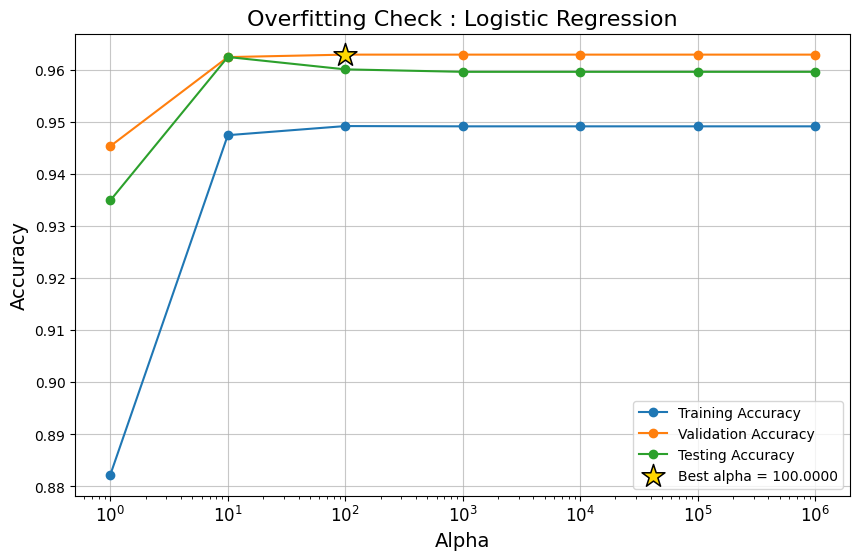

In [ ]:
best_index = np.argmax(val_acc)
best_alpha = max_itterations[best_index]
best_val = val_acc[best_index]

plt.figure(figsize=(10,6))
plt.plot(max_itterations, train_acc, label="Training Accuracy", marker='o')
plt.plot(max_itterations, val_acc, label="Validation Accuracy", marker='o')
plt.plot(max_itterations, test_acc, label="Testing Accuracy", marker='o')

plt.scatter(best_alpha, best_val, color='gold',marker='*' ,s=300, edgecolors='black',linewidths=1.1, zorder=5, label=f'Best alpha = {best_alpha:.4f}')

plt.xlabel("Alpha",fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Overfitting Check : Logistic Regression", fontsize=16)

plt.xscale('log')
plt.xticks(max_itterations,fontsize=12)
plt.legend()
plt.grid(True,alpha=0.7)
plt.show()

In [ ]:
# SVM validation
train_acc = []
val_acc = []
test_acc = []


C_values=[]
for i in range(-2,4):
  C_values.append(10**i)

for c in C_values:
    clf = SVC(C=c, class_weight='balanced')
    clf.fit(x_train_resampled, y_train_resampled)

    train_acc.append(accuracy_score(y_train_resampled, clf.predict(x_train_resampled)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))

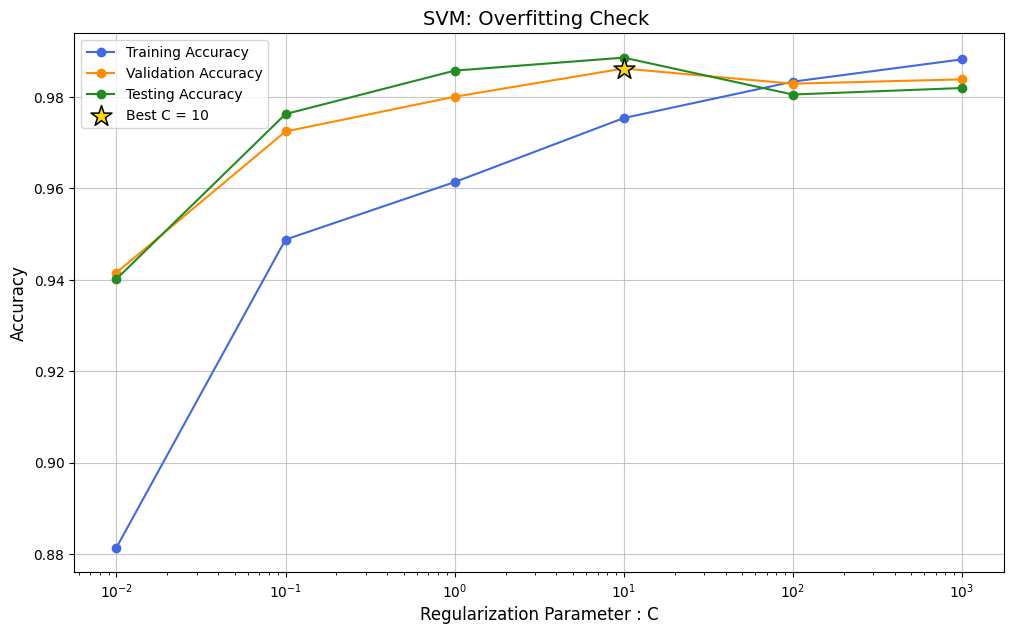

In [ ]:
best_index = np.argmax(val_acc)
best_c = C_values[best_index]
best_val = val_acc[best_index]

plt.figure(figsize=(12, 7))
plt.plot(C_values, train_acc,color='royalblue',label="Training Accuracy",marker='o')
plt.plot(C_values, val_acc, color="darkorange",label="Validation Accuracy", marker='o')
plt.plot(C_values, test_acc, color="forestgreen",label="Testing Accuracy", marker='o')



plt.scatter(best_c, best_val, color='gold',marker='*' ,s=250, edgecolors='black',linewidths=1.1, zorder=5, label=f'Best C = {best_c}')
plt.xscale('log')
plt.xlabel("Regularization Parameter : C", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("SVM: Overfitting Check ",fontsize=14)
plt.xticks(C_values)

plt.grid(True,alpha=0.7)
plt.legend()
plt.show()

In [ ]:
#------------------------------------------------------------------------Decision Tree
train_acc = []
val_acc = []
test_acc = []

for depth in range(1, 15):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(x_train_resampled, y_train_resampled)

    train_acc.append(accuracy_score(y_train_resampled, clf.predict(x_train_resampled)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))

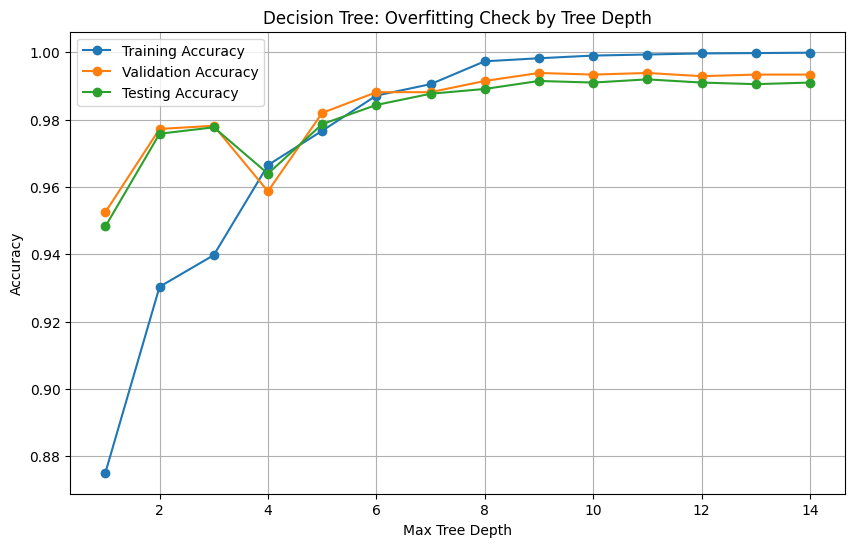

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), train_acc, label="Training Accuracy", marker='o')
plt.plot(range(1, 15), val_acc, label="Validation Accuracy", marker='o')
plt.plot(range(1, 15), test_acc, label="Testing Accuracy", marker='o')

plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Overfitting Check by Tree Depth")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#--------------------------------------------------------------------------Randomforest------------------------------------------------------------------------------------------
train_acc = []
val_acc = []
test_acc = []


for depth in range(1, 100):
    clf = RandomForestClassifier(n_estimators=depth)
    clf.fit(x_train_resampled, y_train_resampled)

    train_acc.append(accuracy_score(y_train_resampled, clf.predict(x_train_resampled)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))



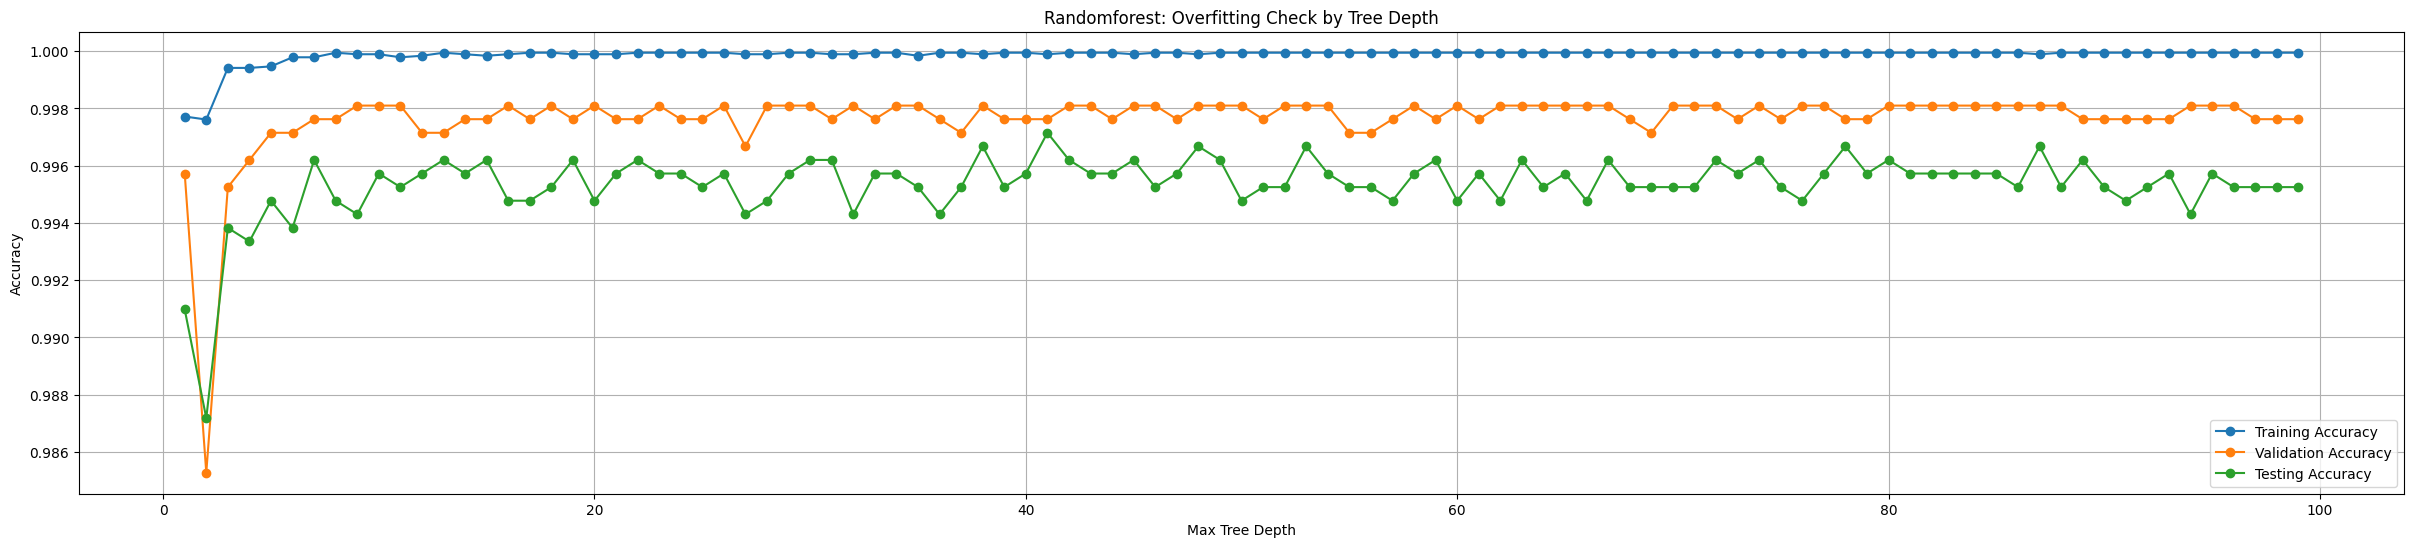

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(range(1, 100), train_acc, label="Training Accuracy", marker='o')
plt.plot(range(1, 100), val_acc, label="Validation Accuracy", marker='o')
plt.plot(range(1, 100), test_acc, label="Testing Accuracy", marker='o')

plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.title("Randomforest: Overfitting Check by Tree Depth")
# plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Accuracy of KNN:", accuracy_knn)
print("Accuracy of Linear Classifier:", accuracy_linear)
print("Accuracy of Ridge regressor:", accuracy_ridge)
print("Accuracy of Logistic regressor:", accuracy_logistic)
print("Accuracy of SVM:", accuracy_svm)
print("Accuracy of Tree:", accuracy_tree)
print("Accuracy of Randomforest:", accuracy_randomforest)

Accuracy of KNN: 0.9886039886039886
Accuracy of Linear Classifier: 0.9886039886039886
Accuracy of Ridge regressor: 0.9586894586894587
Accuracy of Logistic regressor: 0.9601139601139601
Accuracy of SVM: 0.9890788224121557
Accuracy of Tree: 0.9843304843304843
Accuracy of Randomforest: 0.99667616334283


# **Sampling down (Near miss)**

In [ ]:
df4 = df_cleaned_global.copy(deep=True)
x = df4.drop(["class"], axis=1)
y = df4["class"]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
scaled_columns_train= x_train[["destination_host_count","destination_host_server_count","connection_count", "service_type"]]
scaled_columns_val= x_val[["destination_host_count","destination_host_server_count","connection_count", "service_type"]]
scaled_columns_test= x_test[["destination_host_count","destination_host_server_count","connection_count", "service_type"]]
robust.fit(scaled_columns_train)

RobustScaler()

In [ ]:
x_train_scaled=robust.transform(scaled_columns_train)
x_val_scaled=robust.transform(scaled_columns_val)
x_test_scaled=robust.transform(scaled_columns_test)

In [ ]:
df4.drop(["destination_host_count","destination_host_server_count","connection_count","service_type"], axis=1, inplace=True)

In [ ]:
x_train.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_train_scaled
x_val.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_val_scaled
x_test.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_test_scaled

<ipython-input-85-9aefa3c42dba>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.53773585  0.41037736 -0.0754717  ... -0.22641509  0.41037736
 -0.06603774]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_train_scaled
<ipython-input-85-9aefa3c42dba>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.34545455 -1.52121212 -0.86666667 ... -1.34545455  0.00606061
 -1.12121212]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[:, ["destination_host_count","destination_host_server_count","connection_count","service_type"]] = x_train_scaled
<ipython-input-85-9aefa3c42dba>:1: FutureWarning: Setting an item of incompatible dtype is deprecated an

In [ ]:
from imblearn.under_sampling import NearMiss
Nearmiss = NearMiss()
x_train_miss, y_train_miss = Nearmiss.fit_resample(x_train, y_train)

In [ ]:
print("Before Undersampling, counts of label 'Normal': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'Anomaly': {} \n".format(sum(y_train == 0)))



print('After Undersampling, the shape of train_X: {}'.format(x_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)),"\n")



Before Undersampling, counts of label 'Normal': 9423
Before Undersampling, counts of label 'Anomaly': 402 

After Undersampling, the shape of train_X: (804, 20)
After Undersampling, the shape of train_y: (804,) 

After Undersampling, counts of label '1': 402
After Undersampling, counts of label '0': 402 



Accuracy of KNN after SMOTING: 0.5949667616334283
Precision of KNN after SMOTING: 0.9974402730375427
Recall of KNN after SMOTING: 0.5789995047052997
F1 score of KNN after SMOTING: 0.7326856784706989
AUC of KNN after SMOTING: 0.9900242573424562
Confusion Matrix of KNN after SMOTING:
[[  84    3]
 [ 850 1169]]


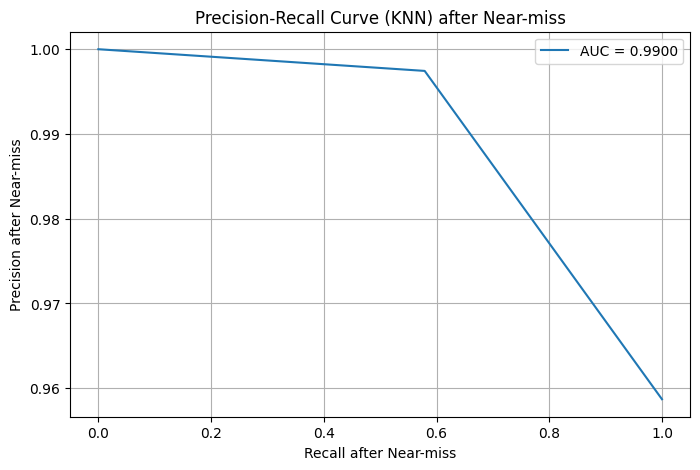

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_miss, y_train_miss)
knn_pred = knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy of KNN after SMOTING:", accuracy_knn)
precision_knn = precision_score(y_test, knn_pred)
print("Precision of KNN after SMOTING:", precision_knn)
recall_knn = recall_score(y_test, knn_pred)
print("Recall of KNN after SMOTING:", recall_knn)
f1_score_knn = f1_score(y_test, knn_pred)
print("F1 score of KNN after SMOTING:", f1_score_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_pred)
auc_knn = auc(recall_knn, precision_knn)
print("AUC of KNN after SMOTING:", auc_knn)
confusion_matrix_knn = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix of KNN after SMOTING:")
print(confusion_matrix_knn)



plt.figure(figsize=(8, 5))
plt.plot(recall_knn, precision_knn, label=f'AUC = {auc_knn:.4f}')
plt.xlabel('Recall after Near-miss')
plt.ylabel('Precision after Near-miss')
plt.title('Precision-Recall Curve (KNN) after Near-miss')
plt.legend()
plt.grid(True)
plt.show()


Accuracy of Ridge regressor: 0.7207977207977208
Precision of Ridge regressor: 0.9924294562973159
Recall of Ridge regressor: 0.7142149578999505
F1 score of Ridge regressor: 0.8306451612903226
AUC of Ridge regressor: 0.9903117607548535
Confusion Matrix of Ridge regressor:
[[  76   11]
 [ 577 1442]]


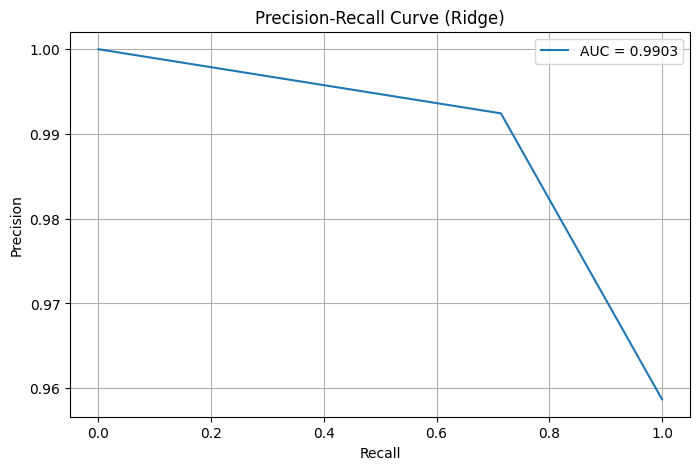

In [ ]:
# Ridge regressor
ridge = RidgeClassifier(alpha=5)
ridge.fit(x_train_miss, y_train_miss)
ridge_pred_scores = ridge.predict(x_test)


ridge_pred = (ridge_pred_scores >= 0.6).astype(int)
accuracy_ridge = accuracy_score(y_test, ridge_pred)
print("Accuracy of Ridge regressor:", accuracy_ridge)
precision_ridge = precision_score(y_test, ridge_pred)
print("Precision of Ridge regressor:", precision_ridge)
recall_ridge = recall_score(y_test, ridge_pred)
print("Recall of Ridge regressor:", recall_ridge)
f1_score_ridge = f1_score(y_test, ridge_pred)
print("F1 score of Ridge regressor:", f1_score_ridge)
precision_ridge, recall_ridge, _ = precision_recall_curve(y_test, ridge_pred)
auc_ridge = auc(recall_ridge, precision_ridge)
print("AUC of Ridge regressor:", auc_ridge)
confusion_matrix_ridge = confusion_matrix(y_test, ridge_pred)
print("Confusion Matrix of Ridge regressor:")
print(confusion_matrix_ridge)






plt.figure(figsize=(8, 5))
plt.plot(recall_ridge, precision_ridge, label=f'AUC = {auc_ridge:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Ridge)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of Logistic regressor: 0.6172839506172839
Precision of Logistic regressor: 0.9951020408163266
Recall of Logistic regressor: 0.6037642397226349
F1 score of Logistic regressor: 0.7515413070283601
AUC of Logistic regressor: 0.9893666635363374
Confusion Matrix of Logistic regressor:
[[  81    6]
 [ 800 1219]]


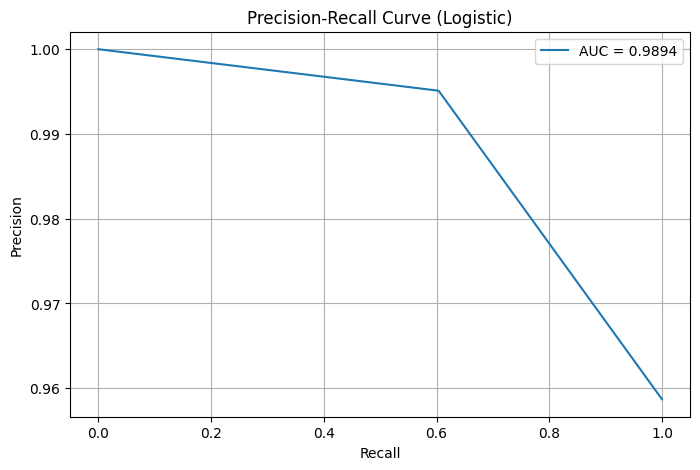

In [ ]:
# Logistic regressor
logistic = LogisticRegressionCV(class_weight='balanced')
logistic.fit(x_train_miss, y_train_miss)
logistic_pred_scores = logistic.predict(x_test)


logistic_pred = (logistic_pred_scores >= 0.6).astype(int)
accuracy_logistic = accuracy_score(y_test, logistic_pred)
print("Accuracy of Logistic regressor:", accuracy_logistic)
precision_logistic = precision_score(y_test, logistic_pred)
print("Precision of Logistic regressor:", precision_logistic)
recall_logistic = recall_score(y_test, logistic_pred)
print("Recall of Logistic regressor:", recall_logistic)
f1_score_logistic = f1_score(y_test, logistic_pred)
print("F1 score of Logistic regressor:", f1_score_logistic)
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, logistic_pred)
auc_logistic = auc(recall_logistic, precision_logistic)
print("AUC of Logistic regressor:", auc_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, logistic_pred)
print("Confusion Matrix of Logistic regressor:")
print(confusion_matrix_logistic)






plt.figure(figsize=(8, 5))
plt.plot(recall_logistic, precision_logistic, label=f'AUC = {auc_logistic:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic)')
plt.legend()
plt.grid(True)
plt.show()

Accuracy of SVM: 0.5807217473884141
Precision of SVM: 0.9973730297723292
Recall of SVM: 0.5641406636948985
F1 score of SVM: 0.7206580196140462
AUC of SVM: 0.989683722327156
Confusion Matrix of SVM:
[[  84    3]
 [ 880 1139]]


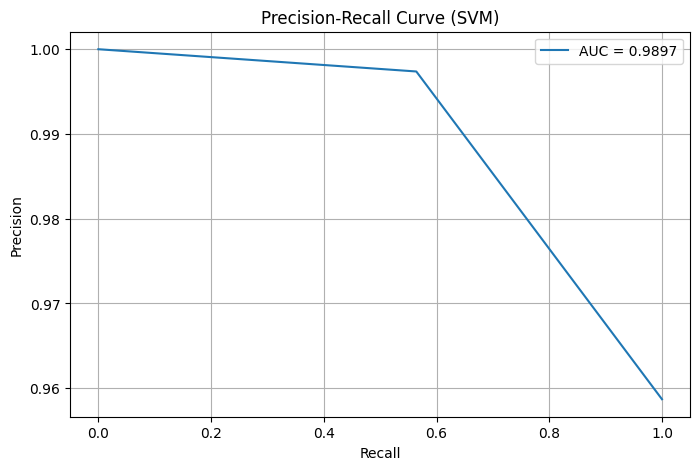

In [ ]:
#SVM
svm = SVC(class_weight='balanced',kernel="rbf",C=100,gamma=0.1)
svm.fit(x_train_miss, y_train_miss)


svm_pred_scores = svm.predict(x_test)


svm_pred = (svm_pred_scores >= 0.6).astype(int)


accuracy_svm = accuracy_score(y_test, svm_pred)
print("Accuracy of SVM:", accuracy_svm)


precision_svm = precision_score(y_test, svm_pred)
print("Precision of SVM:", precision_svm)


recall_svm = recall_score(y_test, svm_pred)
print("Recall of SVM:", recall_svm)


f1_score_svm = f1_score(y_test, svm_pred)
print("F1 score of SVM:", f1_score_svm)


precision_curve_svm, recall_curve_svm, _ = precision_recall_curve(y_test, svm_pred_scores)
auc_svm = auc(recall_curve_svm, precision_curve_svm)
print("AUC of SVM:", auc_svm)


confusion_matrix_svm = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix of SVM:")
print(confusion_matrix_svm)


plt.figure(figsize=(8, 5))
plt.plot(recall_curve_svm, precision_curve_svm, label=f'AUC = {auc_svm:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.legend()
plt.grid(True)
plt.show()


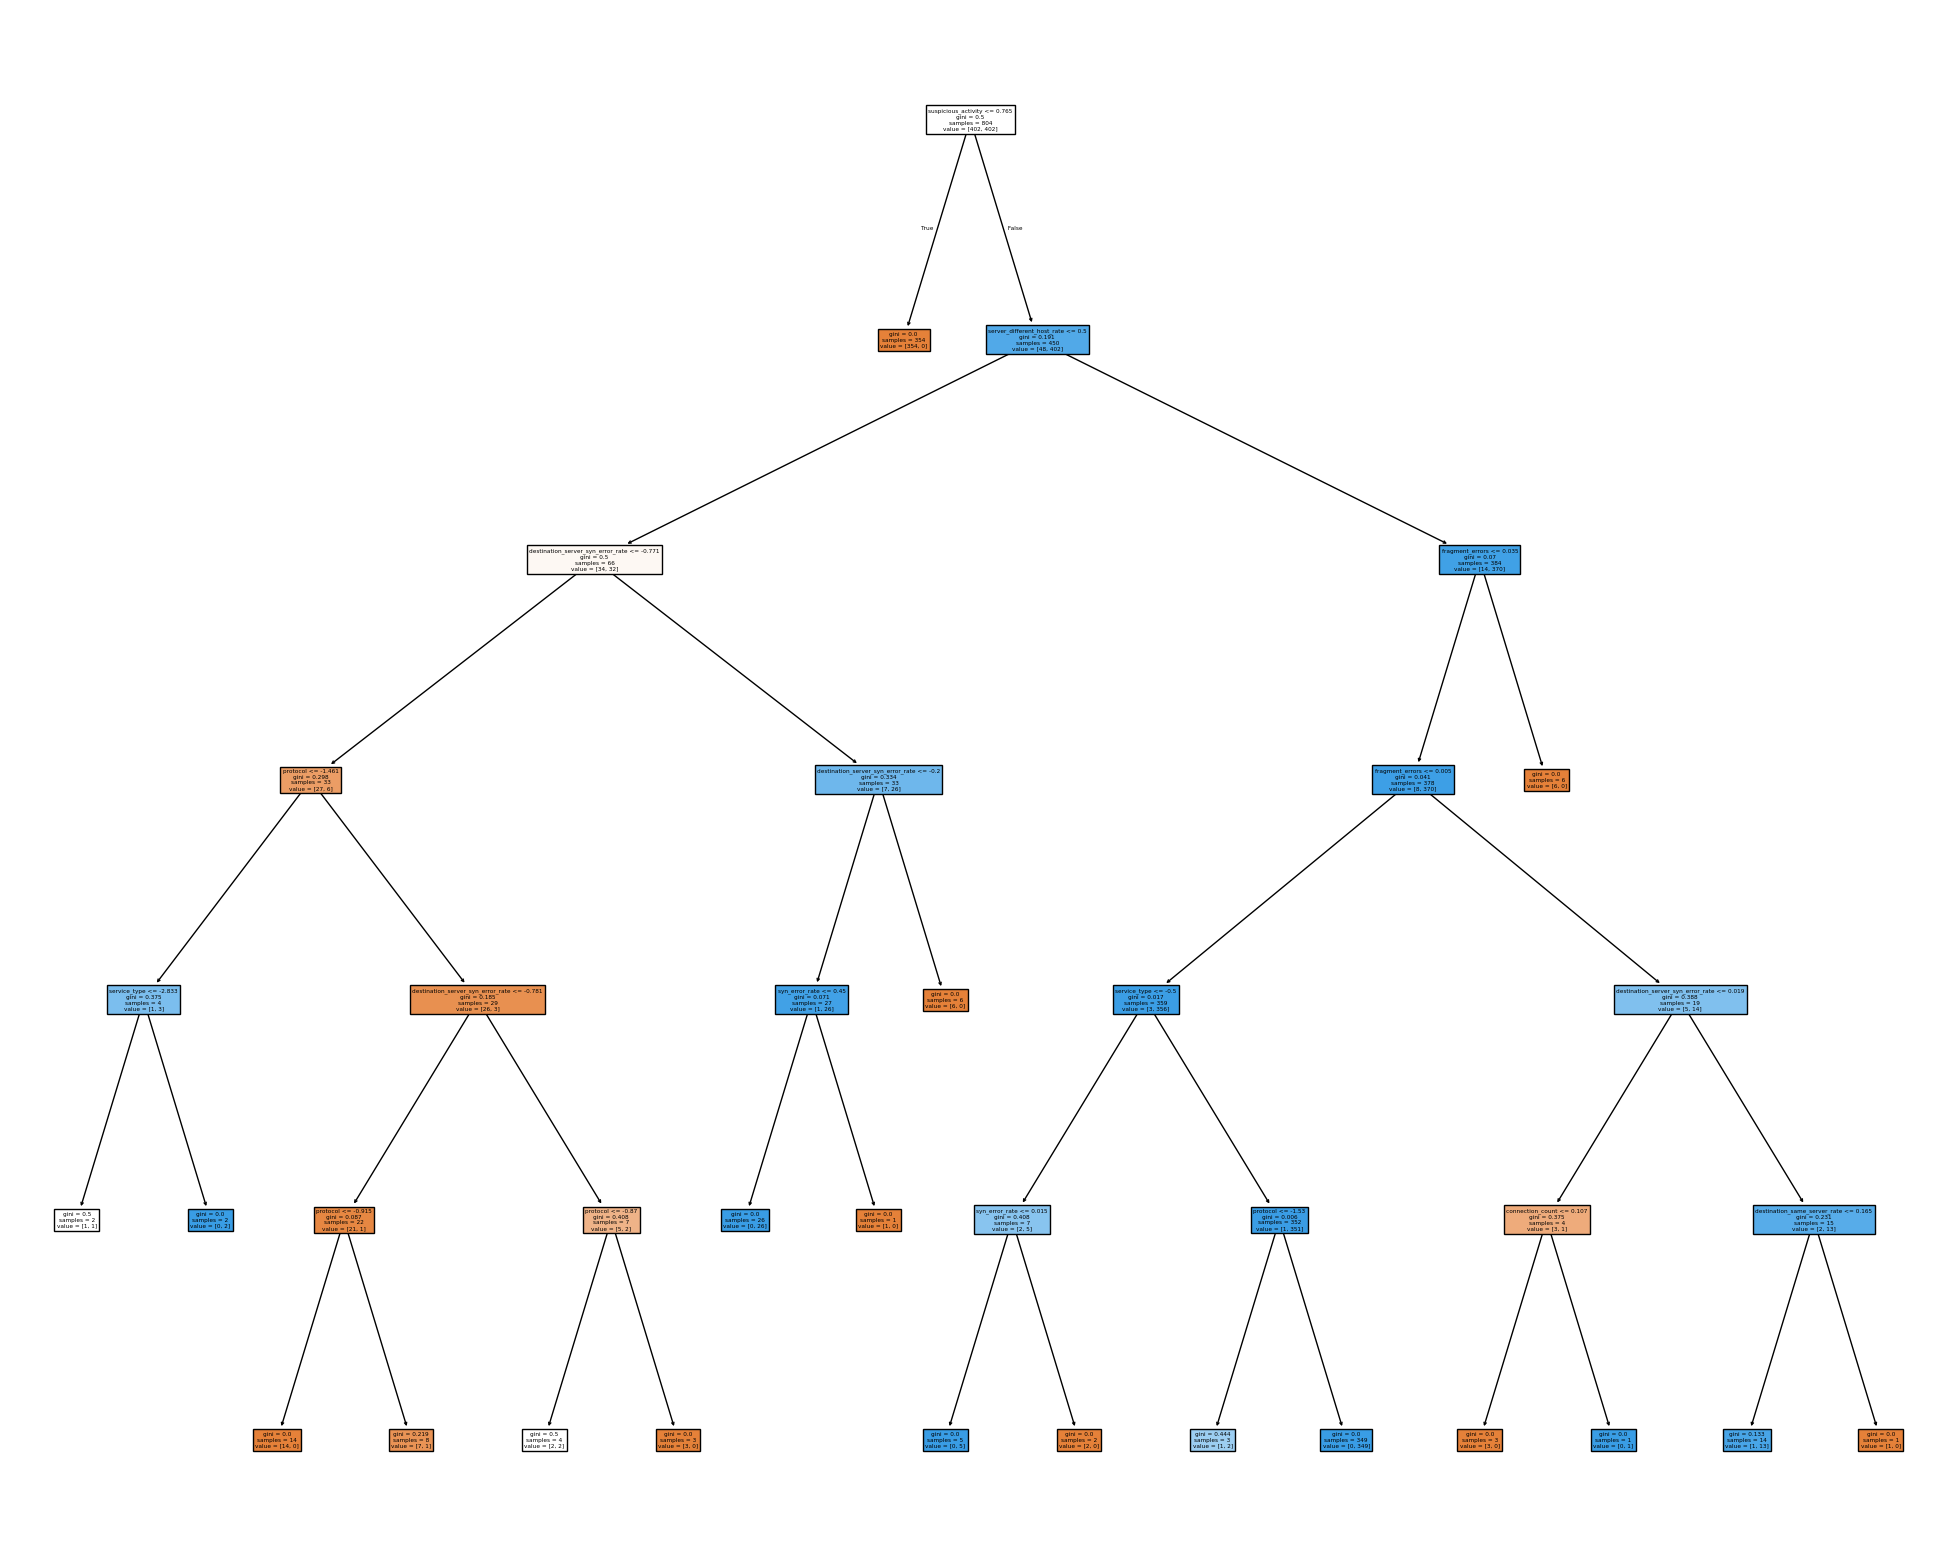

In [ ]:
# Decision tree
from sklearn import tree
model = DecisionTreeClassifier(max_depth=6)
model.fit(x_train_miss, y_train_miss)
text_representation = tree.export_text(model)
plt.figure(figsize=(25,20))
tree.plot_tree(model, feature_names=df.columns, filled=True)
plt.show()

Accuracy of Tree: 0.6016144349477682
Precision of Tree: 0.9983108108108109
Recall of Tree: 0.5854383358098069
F1 score of Tree: 0.7380580705588511
AUC of Tree: 0.9905925220282576
Confusion Matrix of Tree:
[[  85    2]
 [ 837 1182]]


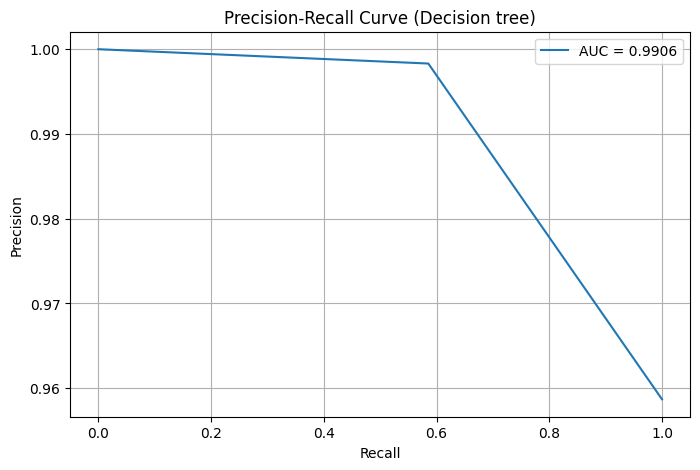

In [ ]:
tree_pred = model.predict(x_test)
accuracy_tree = accuracy_score(y_test, tree_pred)
print("Accuracy of Tree:", accuracy_tree)

precision_tree= precision_score(y_test, tree_pred)
print("Precision of Tree:", precision_tree)

recall_tree= recall_score(y_test, tree_pred)
print("Recall of Tree:", recall_tree)

f1_score_tree = f1_score(y_test, tree_pred)
print("F1 score of Tree:", f1_score_tree)

precision_curve_tree, recall_curve_tree, _ = precision_recall_curve(y_test, tree_pred)
auc_tree = auc(recall_curve_tree, precision_curve_tree)
print("AUC of Tree:", auc_tree)

confusion_matrix_tree = confusion_matrix(y_test, tree_pred)
print("Confusion Matrix of Tree:")
print(confusion_matrix_tree)


plt.figure(figsize=(8, 5))
plt.plot(recall_curve_tree, precision_curve_tree, label=f'AUC = {auc_tree:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Decision tree)')
plt.legend()
plt.grid(True)
plt.show()

Accuracy of randomforest: 0.5826210826210826
Precision of randomforest: 0.9947916666666666
Recall of randomforest: 0.5676077265973254
F1 score of randomforest: 0.7228003784295175
AUC of randomforest: 0.9884646538969533
Confusion Matrix of randomforest:

 [[  81    6]
 [ 873 1146]]


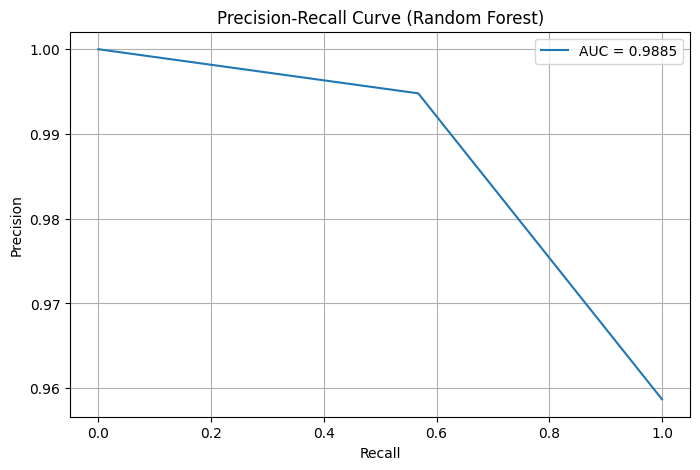

In [ ]:
#Random forest
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train_miss, y_train_miss)


y_pred_Forest= rf_classifier.predict(x_test)


accuracy_randomforest = accuracy_score(y_test, y_pred_Forest)
print("Accuracy of randomforest:", accuracy_randomforest)

precision_randomforest= precision_score(y_test, y_pred_Forest)
print("Precision of randomforest:", precision_randomforest)

recall_randomforest= recall_score(y_test, y_pred_Forest)
print("Recall of randomforest:", recall_randomforest)

f1_score_randomforest = f1_score(y_test, y_pred_Forest)
print("F1 score of randomforest:", f1_score_randomforest)

precision_curve_randomforest, recall_curve_randomforest, _ = precision_recall_curve(y_test, y_pred_Forest)
auc_randomforest = auc(recall_curve_randomforest, precision_curve_randomforest)
print("AUC of randomforest:", auc_randomforest)

confusion_matrix_randomforest = confusion_matrix(y_test, y_pred_Forest)
print("Confusion Matrix of randomforest:")
print("\n",confusion_matrix_randomforest)


plt.figure(figsize=(8, 5))
plt.plot(recall_curve_randomforest, precision_curve_randomforest, label=f'AUC = {auc_randomforest:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

#  **Models** **validation check by Near miss**




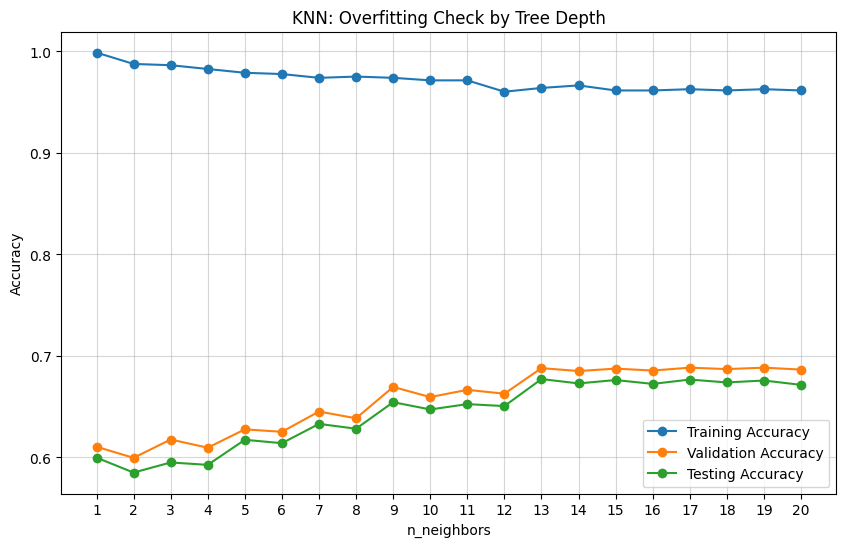

In [ ]:
"""---------------------------------------------------------------------------KNN-----------------------------------------------------------------------------------------------"""
train_acc = []
val_acc = []
test_acc = []

for i in range(1, 21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_miss, y_train_miss)
    train_acc.append(accuracy_score(y_train_miss, clf.predict(x_train_miss)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))


plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_acc,label="Training Accuracy",marker='o')
plt.plot(range(1, 21), val_acc,label="Validation Accuracy",marker='o')
plt.plot(range(1, 21), test_acc, label="Testing Accuracy",marker='o')

plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Overfitting Check by Tree Depth")
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True,alpha=0.5)
plt.show()

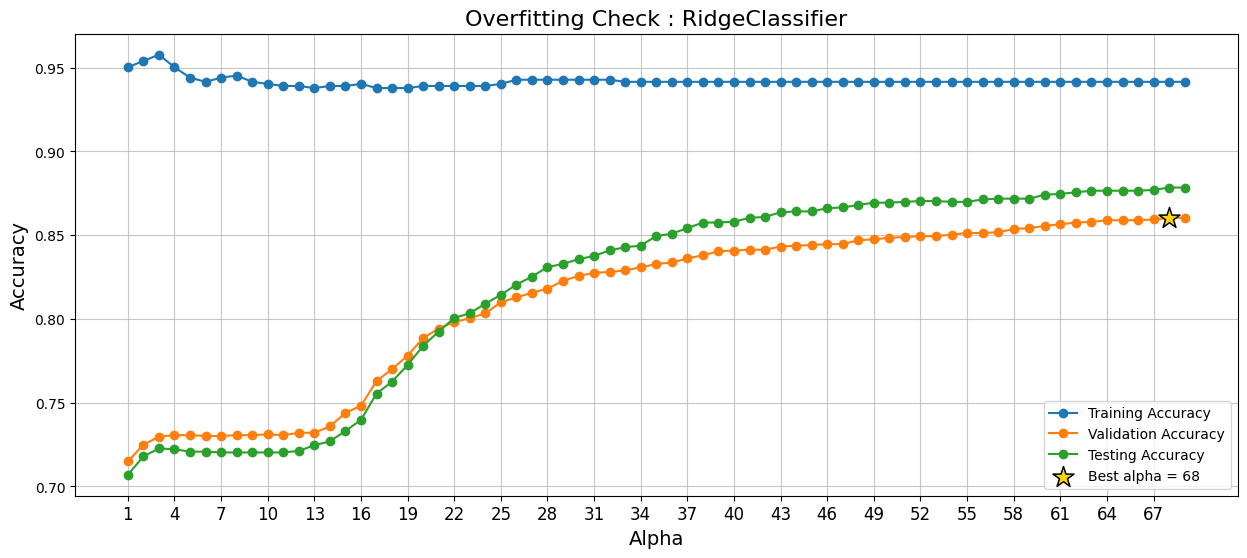

In [ ]:
#Ridge Regression
train_acc = []
val_acc = []
test_acc = []

alpha_values=[]
for i in range(1,70):
  alpha_values.append(i)

for al in alpha_values:
    clf = RidgeClassifier(alpha=al)
    clf.fit(x_train_miss, y_train_miss)

    train_acc.append(accuracy_score(y_train_miss, clf.predict(x_train_miss)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))


best_index = np.argmax(val_acc)
best_alpha = alpha_values[best_index]
best_val = val_acc[best_index]

plt.figure(figsize=(15,6))
plt.plot(alpha_values, train_acc, label="Training Accuracy", marker='o')
plt.plot(alpha_values, val_acc, label="Validation Accuracy", marker='o')
plt.plot(alpha_values, test_acc, label="Testing Accuracy", marker='o')

plt.scatter(best_alpha, best_val, color='gold',marker='*' ,s=250, edgecolors='black',linewidths=1.1, zorder=5, label=f'Best alpha = {best_alpha}')

plt.xlabel("Alpha",fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Overfitting Check : RidgeClassifier", fontsize=16)

plt.xticks(np.arange(1,70,step=3),fontsize=12)
plt.legend()
plt.grid(True,alpha=0.7)
plt.show()


In [ ]:
"""--------------------------------------------------------------------------LOGISTIC-----------------------------------------------------------------------------------------"""
train_acc = []
val_acc = []
test_acc = []

max_itterations=[]
for i in range(0,7):
  max_itterations.append(10**i)

for max_i in max_itterations:
    clf = LogisticRegressionCV(class_weight='balanced', max_iter=max_i, cv=5)
    clf.fit(x_train_miss, y_train_miss)
    train_acc.append(accuracy_score(y_train_miss, clf.predict(x_train_miss)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))


    print(train_acc)
    print(val_acc)
    print(test_acc)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.9104477611940298]
[0.9173396674584323]
[0.9140550807217473]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.9104477611940298, 0.9427860696517413]
[0.9173396674584323, 0.8061757719714965]
[0.9140550807217473, 0.8057929724596391]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.9104477611940298, 0.9427860696517413, 0.9738805970149254]
[0.9173396674584323, 0.8061757719714965, 0.6346793349168646]
[0.9140550807217473, 0.8057929724596391, 0.6172839506172839]
[0.9104477611940298, 0.9427860696517413, 0.9738805970149254, 0.9689054726368159]
[0.9173396674584323, 0.8061757719714965, 0.6346793349168646, 0.6308788598574822]
[0.9140550807217473, 0.8057929724596391, 0.6172839506172839, 0.6120607787274454]
[0.9104477611940298, 0.9427860696517413, 0.9738805970149254, 0.9689054726368159, 0.9689054726368159]
[0.9173396674584323, 0.8061757719714965, 0.6346793349168646, 0.6308788598574822, 0.6308788598574822]
[0.9140550807217473, 0.8057929724596391, 0.6172839506172839, 0.6120607787274454, 0.6120607787274454]
[0.9104477611940298, 0.9427860696517413, 0.9738805970149254, 0.9689054726368159, 0.9689054726368159, 0.9689054726368159]
[0.9173396674584323, 0.8061757719714965, 0.6346793349168646, 0.6308788598574822, 0.6308788598574822, 0.6308788598574822]
[0.9140550807217473, 0.805792

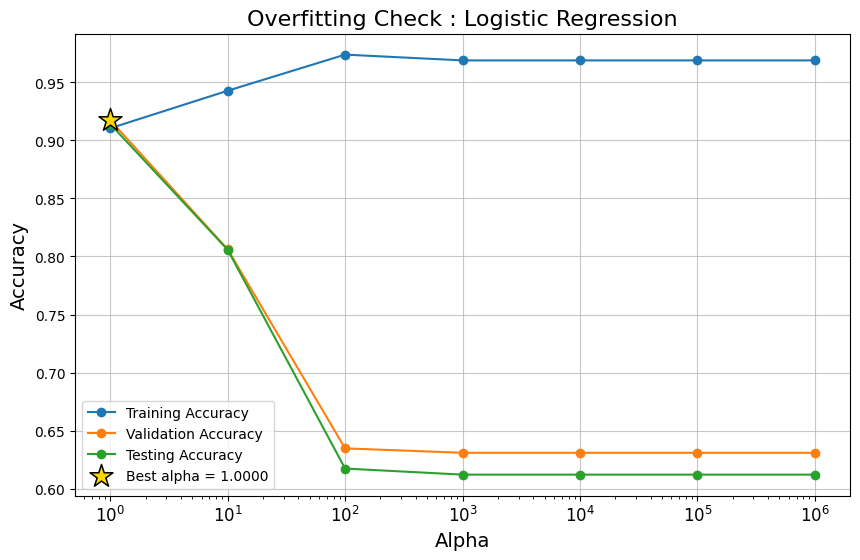

In [ ]:
best_index = np.argmax(val_acc)
best_alpha = max_itterations[best_index]
best_val = val_acc[best_index]


plt.figure(figsize=(10,6))
plt.plot(max_itterations, train_acc, label="Training Accuracy", marker='o')
plt.plot(max_itterations, val_acc, label="Validation Accuracy", marker='o')
plt.plot(max_itterations, test_acc, label="Testing Accuracy", marker='o')


plt.scatter(best_alpha, best_val, color='gold',marker='*' ,s=300, edgecolors='black',linewidths=1.1, zorder=5, label=f'Best alpha = {best_alpha:.4f}')


plt.xlabel("Alpha",fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Overfitting Check : Logistic Regression", fontsize=16)


plt.xscale('log')
plt.xticks(max_itterations,fontsize=12)
plt.legend()
plt.grid(True,alpha=0.7)
plt.show()

In [ ]:
# SVM validation
train_acc = []
val_acc = []
test_acc = []




C_values=[]
for i in range(-2,4):
  C_values.append(10**i)


for c in C_values:
    clf = SVC(C=c, class_weight='balanced')
    clf.fit(x_train_miss, y_train_miss)


    train_acc.append(accuracy_score(y_train_miss, clf.predict(x_train_miss)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))

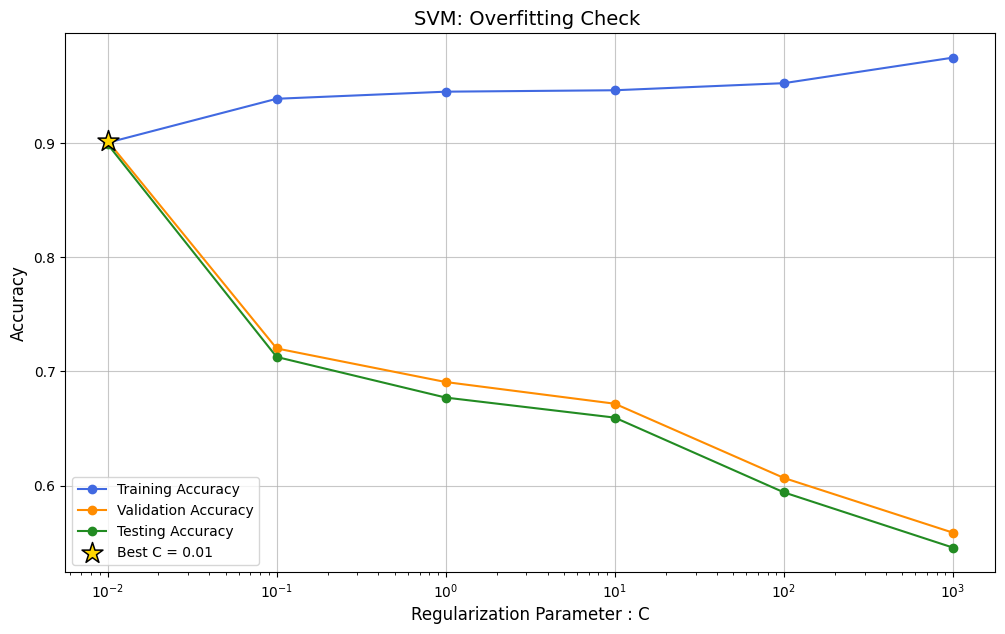

In [ ]:
best_index = np.argmax(val_acc)
best_c = C_values[best_index]
best_val = val_acc[best_index]


plt.figure(figsize=(12, 7))
plt.plot(C_values, train_acc,color='royalblue',label="Training Accuracy",marker='o')
plt.plot(C_values, val_acc, color="darkorange",label="Validation Accuracy", marker='o')
plt.plot(C_values, test_acc, color="forestgreen",label="Testing Accuracy", marker='o')


plt.scatter(best_c, best_val, color='gold',marker='*' ,s=250, edgecolors='black',linewidths=1.1, zorder=5, label=f'Best C = {best_c}')
plt.xscale('log')
plt.xlabel("Regularization Parameter : C", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("SVM: Overfitting Check ",fontsize=14)
plt.xticks(C_values)


plt.grid(True,alpha=0.7)
plt.legend()
plt.show()

In [93]:
#------------------------------------------------------------------------Decision Tree
train_acc = []
val_acc = []
test_acc = []

for depth in range(1, 15):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(x_train_miss, y_train_miss)

    train_acc.append(accuracy_score(y_train_miss, clf.predict(x_train_miss)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))

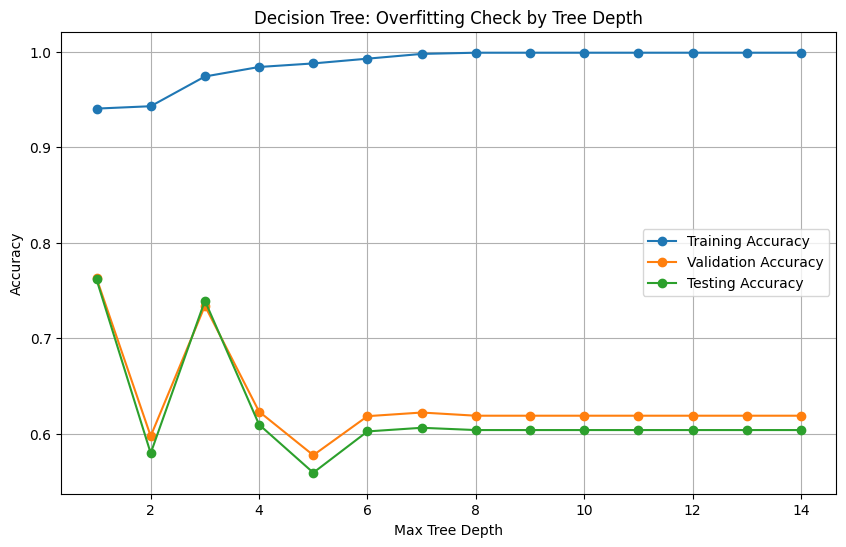

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), train_acc, label="Training Accuracy", marker='o')
plt.plot(range(1, 15), val_acc, label="Validation Accuracy", marker='o')
plt.plot(range(1, 15), test_acc, label="Testing Accuracy", marker='o')

plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Overfitting Check by Tree Depth")
plt.legend()
plt.grid(True)
plt.show()

In [95]:
#--------------------------------------------------------------------------Randomforest------------------------------------------------------------------------------------------
train_acc = []
val_acc = []
test_acc = []


for depth in range(1, 100):
    clf = RandomForestClassifier(n_estimators=depth)
    clf.fit(x_train_miss, y_train_miss)

    train_acc.append(accuracy_score(y_train_miss, clf.predict(x_train_miss)))
    val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))



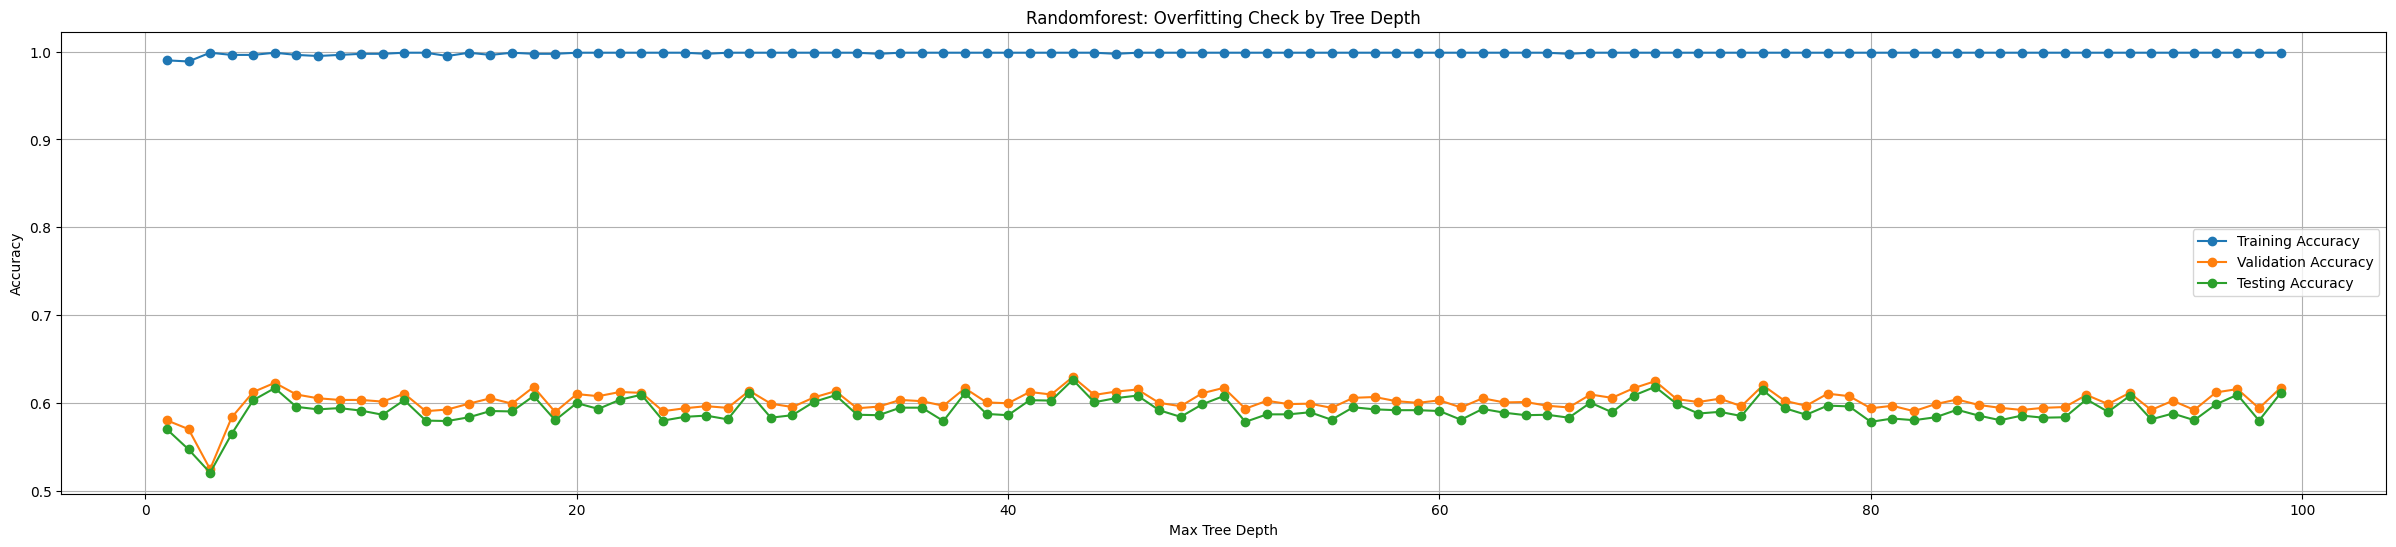

In [96]:
plt.figure(figsize=(30, 6))
plt.plot(range(1, 100), train_acc, label="Training Accuracy", marker='o')
plt.plot(range(1, 100), val_acc, label="Validation Accuracy", marker='o')
plt.plot(range(1, 100), test_acc, label="Testing Accuracy", marker='o')

plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.title("Randomforest: Overfitting Check by Tree Depth")
# plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()